# Linguistic complexity of language using spectral graph theory

In [1]:
import networkx as nx
import operator
import itertools
from nltk import sent_tokenize
from nltk import word_tokenize
import matplotlib.pyplot as plt
import numpy as np
import xml.etree.ElementTree as ET
import pickle
from collections import Counter
from numpy import linalg as LA
import math
from sklearn import cluster
from matplotlib.text import TextPath
from sklearn.manifold import TSNE
import pandas as pd
import scipy
import string
import random
import community

## functions to extract text

In [2]:
def extract_bible_text(lang):
    root = ET.fromstring(open(lang + '.xml').read())
    with open(lang + '.txt', 'w', encoding='utf-8') as out:
        for n in root.iter('seg'):
            try:
                out.write(n.text.strip() + '\n')
            except AttributeError:
                pass
    file = open(lang+'.txt', 'r') 
    bible=file.read().split('\n')
    #bible=[item for sublist in bible for item in sublist]
    return bible

In [3]:
books_NT=['b.MAT','b.MAR','b.LUK','b.JOH','b.ACT','b.ROM','b.1CO','b.2CO','b.GAL','b.EPH','b.PHI','b.COL',
          'b.1TH','b.2TH','b.1TI','b.2TI','b.TIT','b.PHM','b.HEB','b.JAM','b.1PE','b.2PE','b.1JO','b.2JO',
          'b.3JO','b.JUD','b.REV']

def new_testament(lang):
    root = ET.fromstring(open(lang + '.xml').read())
    NT=[]
    for book in books_NT:
        with open(lang + '-' + book + '.txt', 'w', encoding='utf-8') as out:
            for n in root.findall('.//div[@id="'+book+'"]/*seg'):
                out.write(n.text.strip() + '\n')
        file = open(lang + '-' + book + '.txt', 'r') 
        book_text=file.read().split('\n')
        NT+=book_text
    
    return NT

## languages

In [4]:
#language_names = ['Latin','Spanish','French','Italian','Portuguese','Romanian']
language_names = ['Achuar-NT','Aguaruna-NT','Akawaio-NT','Amuzgo-NT','Cabecar-NT','Cakchiquel-NT','Cherokee-NT',
                  'Chinantec-NT','English','Jakalteko-NT','Kiche-NT','Mam-NT','Nahuatl-NT','Ojibwa-NT','Qeqchi','Quichua-NT',
                  'Shuar-NT','Spanish','Uspanteco-NT']

languages = {}
for language in language_names:
    if language=='Spanish':
        languages[language]=new_testament(language)
    elif language=='English':
        languages[language]=new_testament(language)
    elif language=='Qeqchi':
        languages[language]=new_testament(language)
    else:
        languages[language.replace('-NT','')]=extract_bible_text(language)#' '.join(extract_bible_text(language))

In [5]:
for language in languages.keys():
    print(language, languages[language][0])

Achuar Ju papikia Jesucristo pachisar aarmawaitai. Jesucristo Davidta weari ayayi. Tura Davidcha Abrahama weari ayayi. Tura Abrahama weari ainau, tura Davidta weari ainau naaringkia ju papinum aarmawaitai.
Aguaruna Ju ainawai Jisukristu muunji aajakajua nuna daaji agatkamua duka. Nigka David, Abraham aina nu wegantu aajakuí.
Akawaio Serɨ serɨ Sises tamokori ton ese' asi', kin pe te'sen Tepi' pa pe iyesi'pʉ, Epʉra'an pa pe nɨrɨ kanan iyesi'pʉ.
Amuzgo Luaa ñˈoom na matseijndaaˈñenaˈ tsjaaⁿ nnˈaⁿ na tuiiñe Jesucristo, na wjaacˈoomnaˈ David ñequio Abraham na jndyowicantyjooˈ joona na tueˈcañoomnaˈ jom.
Cabecar Jesucristo David yäbei, Abraham yäbei, je wätsikiwa̱k wa kie äyëí yöle rä jikäi:
Cakchiquel Re wuj ri nuchop el waweˈ, jun wuj ri tzˈibatal wi ca ri quibiˈ ri ye ojer tak ratiˈt rumamaˈ ri Jesucristo. Can nikˈalajin wi cˈa chi Riyaˈ can jun chique ri ye ralcˈual ca ri rey David, y can ralcˈual ca chukaˈ ri Abraham.
Cherokee ᎯᎠ ᎪᏪᎵ ᎧᏃᎮᎭ ᏧᏁᏢᏔᏅᏒ ᏥᏌ ᎦᎶᏁᏛ, ᏕᏫ ᎤᏪᏥ, ᎡᏆᎭᎻ ᎤᏪᏥ.
Chinantec I̱ l

## tokenization

In [6]:
def clean(language):
    table = str.maketrans({key: None for key in '!"#$%&\¿()*+,-./:;<=>?@[\\]_{|}'})
    language=[list(filter(None, [w.lower().translate(table) for w in word_tokenize(sentence)])) for sentence in language if len([w.lower() for w in [w.translate(table) for w in word_tokenize(sentence)]])>0]
    return language

In [7]:
for language in languages.keys():
    print(language)
    languages[language]=clean(languages[language])

Achuar
Aguaruna
Akawaio
Amuzgo
Cabecar
Cakchiquel
Cherokee
Chinantec
English
Jakalteko
Kiche
Mam
Nahuatl
Ojibwa
Qeqchi
Quichua
Shuar
Spanish
Uspanteco


In [8]:
len(language_names)

19

In [9]:
for language in languages.keys():
    print(language, languages[language][0])

Achuar ['ju', 'papikia', 'jesucristo', 'pachisar', 'aarmawaitai', 'jesucristo', 'davidta', 'weari', 'ayayi', 'tura', 'davidcha', 'abrahama', 'weari', 'ayayi', 'tura', 'abrahama', 'weari', 'ainau', 'tura', 'davidta', 'weari', 'ainau', 'naaringkia', 'ju', 'papinum', 'aarmawaitai']
Aguaruna ['ju', 'ainawai', 'jisukristu', 'muunji', 'aajakajua', 'nuna', 'daaji', 'agatkamua', 'duka', 'nigka', 'david', 'abraham', 'aina', 'nu', 'wegantu', 'aajakuí']
Akawaio ['serɨ', 'serɨ', 'sises', 'tamokori', 'ton', 'ese', "'", 'asi', "'", 'kin', 'pe', "te'sen", 'tepi', "'", 'pa', 'pe', "iyesi'pʉ", "epʉra'an", 'pa', 'pe', 'nɨrɨ', 'kanan', "iyesi'pʉ"]
Amuzgo ['luaa', 'ñˈoom', 'na', 'matseijndaaˈñenaˈ', 'tsjaaⁿ', 'nnˈaⁿ', 'na', 'tuiiñe', 'jesucristo', 'na', 'wjaacˈoomnaˈ', 'david', 'ñequio', 'abraham', 'na', 'jndyowicantyjooˈ', 'joona', 'na', 'tueˈcañoomnaˈ', 'jom']
Cabecar ['jesucristo', 'david', 'yäbei', 'abraham', 'yäbei', 'je', 'wätsikiwa̱k', 'wa', 'kie', 'äyëí', 'yöle', 'rä', 'jikäi']
Cakchiquel ['re', '

In [10]:
words_entropy={}
words={}
mean_tokens=[]
mean_types=[]
mean_verses=[]
for language in languages:
    words_entropy[language]=[item for sublist in languages[language] for item in sublist]
    words[language]=[len([item for sublist in languages[language] for item in sublist]),len(set([item for sublist in languages[language] for item in sublist])),Counter([item for sublist in languages[language] for item in sublist])]
    mean_verses+=[len(languages[language])]
    mean_tokens+=[len([item for sublist in languages[language] for item in sublist])]
    mean_types+=[len(set([item for sublist in languages[language] for item in sublist]))]
    print(language,len(languages[language]),len([item for sublist in languages[language] for item in sublist]),len(set([item for sublist in languages[language] for item in sublist])))

Achuar 7646 176499 19240
Aguaruna 7946 150931 24933
Akawaio 7734 231633 8631
Amuzgo 7864 200928 14185
Cabecar 7952 201346 8293
Cakchiquel 7852 314530 8300
Cherokee 7957 116733 25537
Chinantec 7818 306046 11899
English 7957 180769 5973
Jakalteko 7849 219494 12160
Kiche 7886 272692 7206
Mam 7791 216865 10946
Nahuatl 7822 176717 15476
Ojibwa 7943 142440 36436
Qeqchi 7957 256185 8958
Quichua 7937 116883 14944
Shuar 7818 138670 23053
Spanish 7957 168456 11453
Uspanteco 7890 226076 8676


In [11]:
sum(mean_tokens)

3813893

In [12]:
np.mean(mean_types)

14542.052631578947

In [13]:
np.mean(mean_verses)

7872.421052631579

In [14]:
sum(mean_verses)

149576

In [15]:
most={}
for language in languages:
    most[language]=list(zip(*words[language][2].most_common()))[0]

In [16]:
distributions={}
for language in languages.keys():
    distributions[language]=list(dict(Counter(words_entropy[language])).values())

In [17]:
TTR_languages={}
for language in languages.keys():
    TTR_languages[language]=words[language][1]/float(words[language][0])

In [18]:
TTR_languages

{'Achuar': 0.10900911619895863,
 'Aguaruna': 0.16519469161404882,
 'Akawaio': 0.03726153009286241,
 'Amuzgo': 0.07059742793438446,
 'Cabecar': 0.04118780606518133,
 'Cakchiquel': 0.026388579785712015,
 'Cherokee': 0.2187641883614745,
 'Chinantec': 0.03887977624278703,
 'English': 0.033042169841067885,
 'Jakalteko': 0.05540014761223541,
 'Kiche': 0.026425417687354232,
 'Mam': 0.05047379706268877,
 'Nahuatl': 0.08757504937272588,
 'Ojibwa': 0.25579893288402133,
 'Qeqchi': 0.03496691843784765,
 'Quichua': 0.1278543500765723,
 'Shuar': 0.16624359991346363,
 'Spanish': 0.06798807997340552,
 'Uspanteco': 0.03837647516764274}

In [19]:
from scipy.stats import entropy

entropy_languages={}
for language in languages.keys():
    entropy_languages[language]=entropy(distributions[language],base=2)

In [20]:
entropy_languages

{'Achuar': 10.631626639781631,
 'Aguaruna': 11.52799803809537,
 'Akawaio': 7.972965978647055,
 'Amuzgo': 9.163405390920296,
 'Cabecar': 8.71840326886548,
 'Cakchiquel': 8.018664042740541,
 'Cherokee': 11.082922677025193,
 'Chinantec': 8.419064617423814,
 'English': 8.583044940362617,
 'Jakalteko': 8.967310488392142,
 'Kiche': 8.059204558101387,
 'Mam': 9.43209239344775,
 'Nahuatl': 9.340317519509602,
 'Ojibwa': 11.534243745622122,
 'Qeqchi': 8.212759307572483,
 'Quichua': 10.919319926042395,
 'Shuar': 10.98567580671937,
 'Spanish': 9.228476075033335,
 'Uspanteco': 8.860296424739031}

In [61]:
#def wordform_net(language):
#    W=most[language]
#    G=nx.Graph()
#    word_pairs=list(itertools.combinations(W,2))
#    for pair in word_pairs:
#        if pair[0] in pair[1] or pair[1] in pair[0]:
#            if G.has_edge(pair[0],pair[1])==False:
#                G.add_edge(pair[0],pair[1])
#    
#    return G

In [62]:
#wordform_networks={}
#for language in languages.keys():
#    print(language)
#    wordform_networks[language]=wordform_net(language)

In [63]:
#pickle.dump(wordform_networks,open('wordform_networks.p','wb'))

In [64]:
#wordform_networks=pickle.load(open('wordform_networks.p','rb'))

In [65]:
#len(wordform_networks[language])

## Co-occurrence networks

In [22]:
## original networks
def GoW_adj(text_clean,language,W):
    G=nx.Graph()
    for sentence in text_clean:
        sentence=list(filter(lambda x: x in W, sentence))
        if len(sentence)>1:
            pairs=list(zip(sentence,sentence[1:]))
            for pair in pairs:
                if G.has_edge(pair[0],pair[1])==False:
                    G.add_edge(pair[0],pair[1],weight=1)
                else:
                    x=G[pair[0]][pair[1]]['weight']
                    G[pair[0]][pair[1]]['weight']=x+1
        
    return G

In [23]:
graphs_adj={}
for language in languages.keys():
    print(language)
    G=GoW_adj(languages[language],language,list(zip(*words[language][2].most_common()))[0])
    graphs_adj[language]=G

Achuar
Aguaruna
Akawaio
Amuzgo
Cabecar
Cakchiquel
Cherokee
Chinantec
English
Jakalteko
Kiche
Mam
Nahuatl
Ojibwa
Qeqchi
Quichua
Shuar
Spanish
Uspanteco


In [24]:
pickle.dump(graphs_adj,open('graphs_adj.p','wb'))

In [21]:
graphs_adj=pickle.load(open('graphs_adj.p','rb'))

## Laplacian energy

In [38]:
def energy(G):
    M=nx.normalized_laplacian_matrix(G,weight='weight').todense()
    eigs=LA.eigvals(M)
    max_eig=sorted(eigs)[1]
    eigs=[np.abs(x-1) for x in eigs]
    return [sum(eigs)/float(len(eigs)),np.real(max_eig)]

In [33]:
E_adj={}
max_adj={}
for language in languages.keys():
    print(language)
    E=energy(graphs_adj[language])
    E_adj[language]=E[0]
    max_adj[language]=E[1]

Achuar
Aguaruna
Akawaio
Amuzgo
Cabecar
Cakchiquel
Cherokee
Chinantec
English
Jakalteko
Kiche
Mam
Nahuatl
Ojibwa
Qeqchi
Quichua
Shuar
Spanish
Uspanteco


In [34]:
E_adj

{'Achuar': 0.1687315697420599,
 'Aguaruna': 0.2242452205372876,
 'Akawaio': 0.06933064339256921,
 'Amuzgo': 0.08782895358492232,
 'Cabecar': 0.09323590270211427,
 'Cakchiquel': 0.06600220770723236,
 'Cherokee': 0.22161704451702668,
 'Chinantec': 0.05814983884364286,
 'English': 0.07489305333217876,
 'Jakalteko': 0.09288156539288538,
 'Kiche': 0.06022113136659383,
 'Mam': 0.08891867281311375,
 'Nahuatl': 0.08966888199332962,
 'Ojibwa': 0.2335728641051627,
 'Qeqchi': 0.06008909446211801,
 'Quichua': 0.1818281586515686,
 'Shuar': 0.19412331624734144,
 'Spanish': 0.08770457325408992,
 'Uspanteco': 0.08650246892455517}

In [35]:
max_adj

{'Achuar': (0.01921427842169421+0j),
 'Aguaruna': (0.03401564547771178+0j),
 'Akawaio': (0.12999260777483695+0j),
 'Amuzgo': (0.13201969519260737+0j),
 'Cabecar': (0.1323661064319417+0j),
 'Cakchiquel': (0.13393466388875885+0j),
 'Cherokee': (2.087272072870008e-15+0j),
 'Chinantec': (0.25956912583830427+0j),
 'English': (0.13289603284864365+0j),
 'Jakalteko': (0.1889017169199193+0j),
 'Kiche': (0.25519341896302494+0j),
 'Mam': (0.13227041411477763+0j),
 'Nahuatl': (0.12995740810018458+0j),
 'Ojibwa': (3.1086244689504383e-15+0j),
 'Qeqchi': (0.11790707271895928+0j),
 'Quichua': (0.04707221329882866+0j),
 'Shuar': (0.036312970300858435+0j),
 'Spanish': (0.129849862033314+0j),
 'Uspanteco': (0.1899084848228373+0j)}

In [36]:
pickle.dump(E_adj,open('E_adj.p','wb'))

In [22]:
E_adj=pickle.load(open('E_adj.p','rb'))

### correlation

In [23]:
from scipy.stats import spearmanr

In [24]:
entropy_languages

{'Achuar': 10.631626639781631,
 'Aguaruna': 11.52799803809537,
 'Akawaio': 7.972965978647055,
 'Amuzgo': 9.163405390920296,
 'Cabecar': 8.71840326886548,
 'Cakchiquel': 8.018664042740541,
 'Cherokee': 11.082922677025193,
 'Chinantec': 8.419064617423814,
 'English': 8.583044940362617,
 'Jakalteko': 8.967310488392142,
 'Kiche': 8.059204558101387,
 'Mam': 9.43209239344775,
 'Nahuatl': 9.340317519509602,
 'Ojibwa': 11.534243745622122,
 'Qeqchi': 8.212759307572483,
 'Quichua': 10.919319926042395,
 'Shuar': 10.98567580671937,
 'Spanish': 9.228476075033335,
 'Uspanteco': 8.860296424739031}

0.9426414375340979


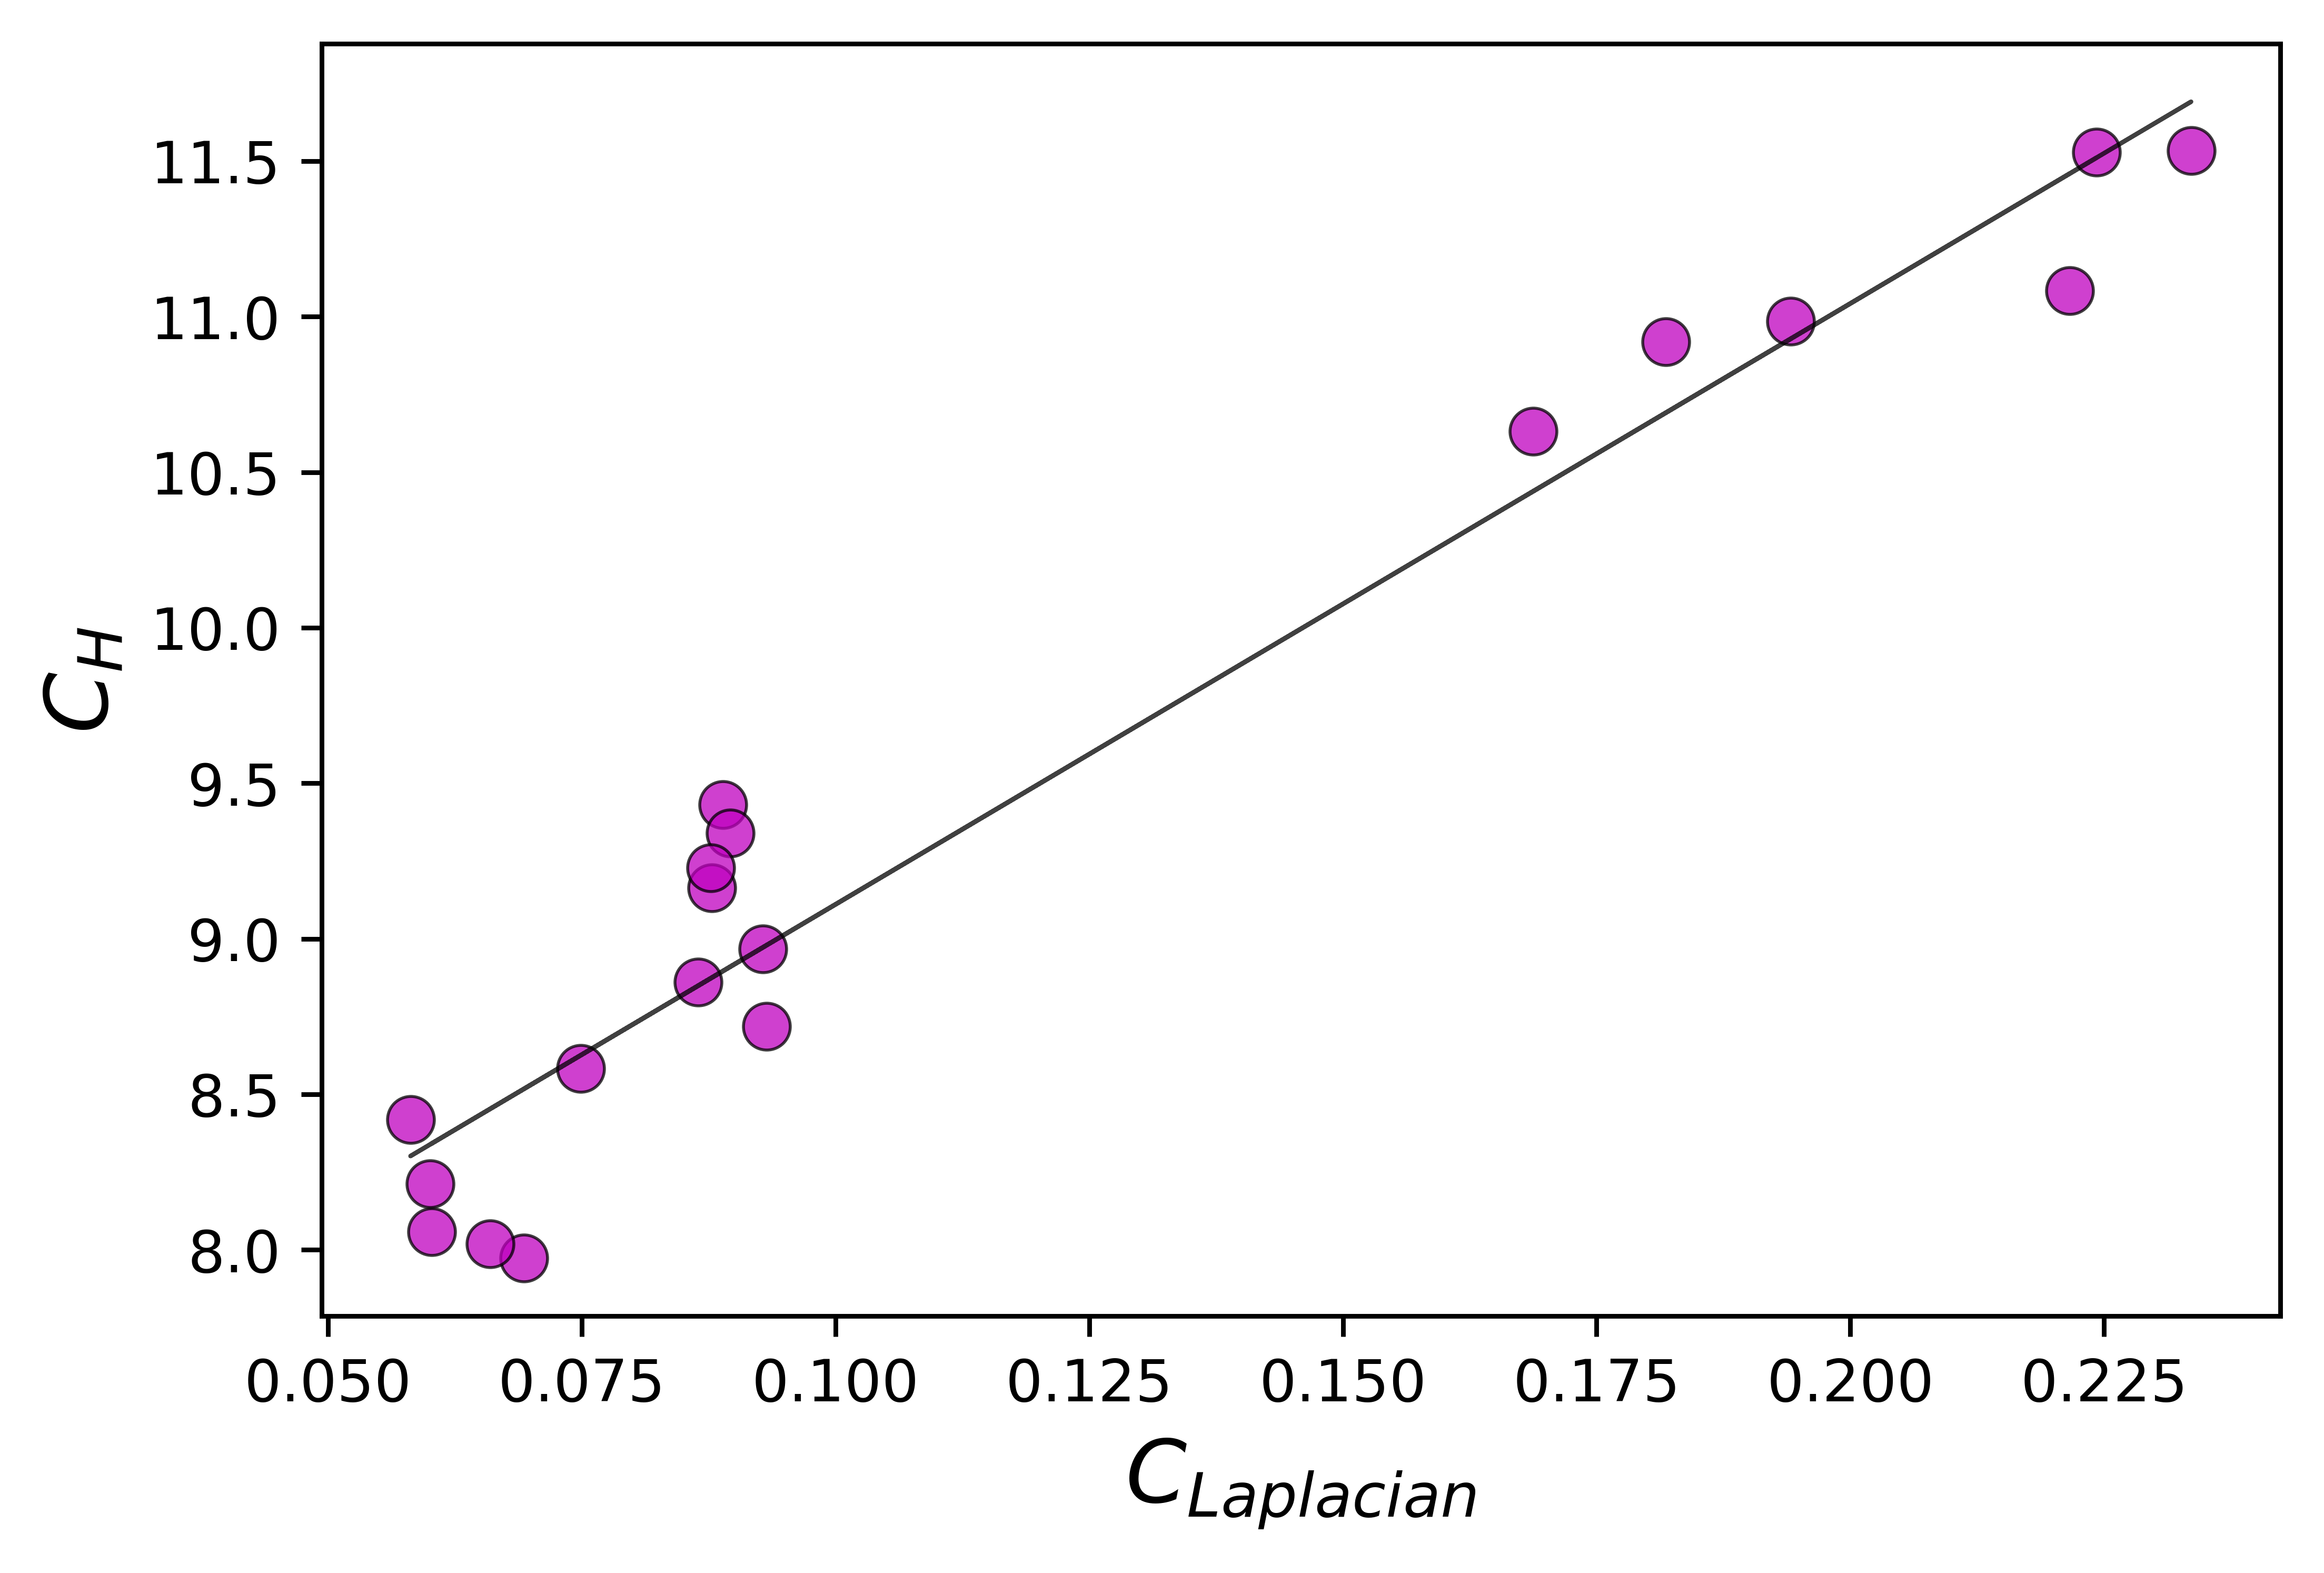

In [26]:
cmap = plt.get_cmap('RdBu')

fig, ax = plt.subplots(dpi=800)

from sklearn.linear_model import LinearRegression

x = np.array(list(E_adj.values())).reshape((-1, 1))
y = np.array(list(entropy_languages.values()))

model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print(r_sq)
y_pred = model.predict(x)

ax.plot(list(E_adj.values()),list(entropy_languages.values()),'o',color='m',markersize=8,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True)
ax.plot(x,y_pred,color='k',linewidth=0.75,alpha=0.75,fillstyle='full',clip_on=True)

plt.grid(False)
#plt.legend(loc='best')
#plt.xlim([-4.25,7.25])
#plt.ylim([-1.75,2.25])
plt.ylabel(r'$C_{H}$',fontsize=15)
plt.xlabel(r'$C_{Laplacian}$',fontsize=15)
plt.rcParams.update({'font.size': 10})
plt.savefig('corr_adj_entropy.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [27]:
from scipy.stats import spearmanr

In [28]:
spearmanr(list(E_adj.values()),list(entropy_languages.values()))

SpearmanrResult(correlation=0.9070175438596491, pvalue=8.557209257219029e-08)

0.9068130388690796


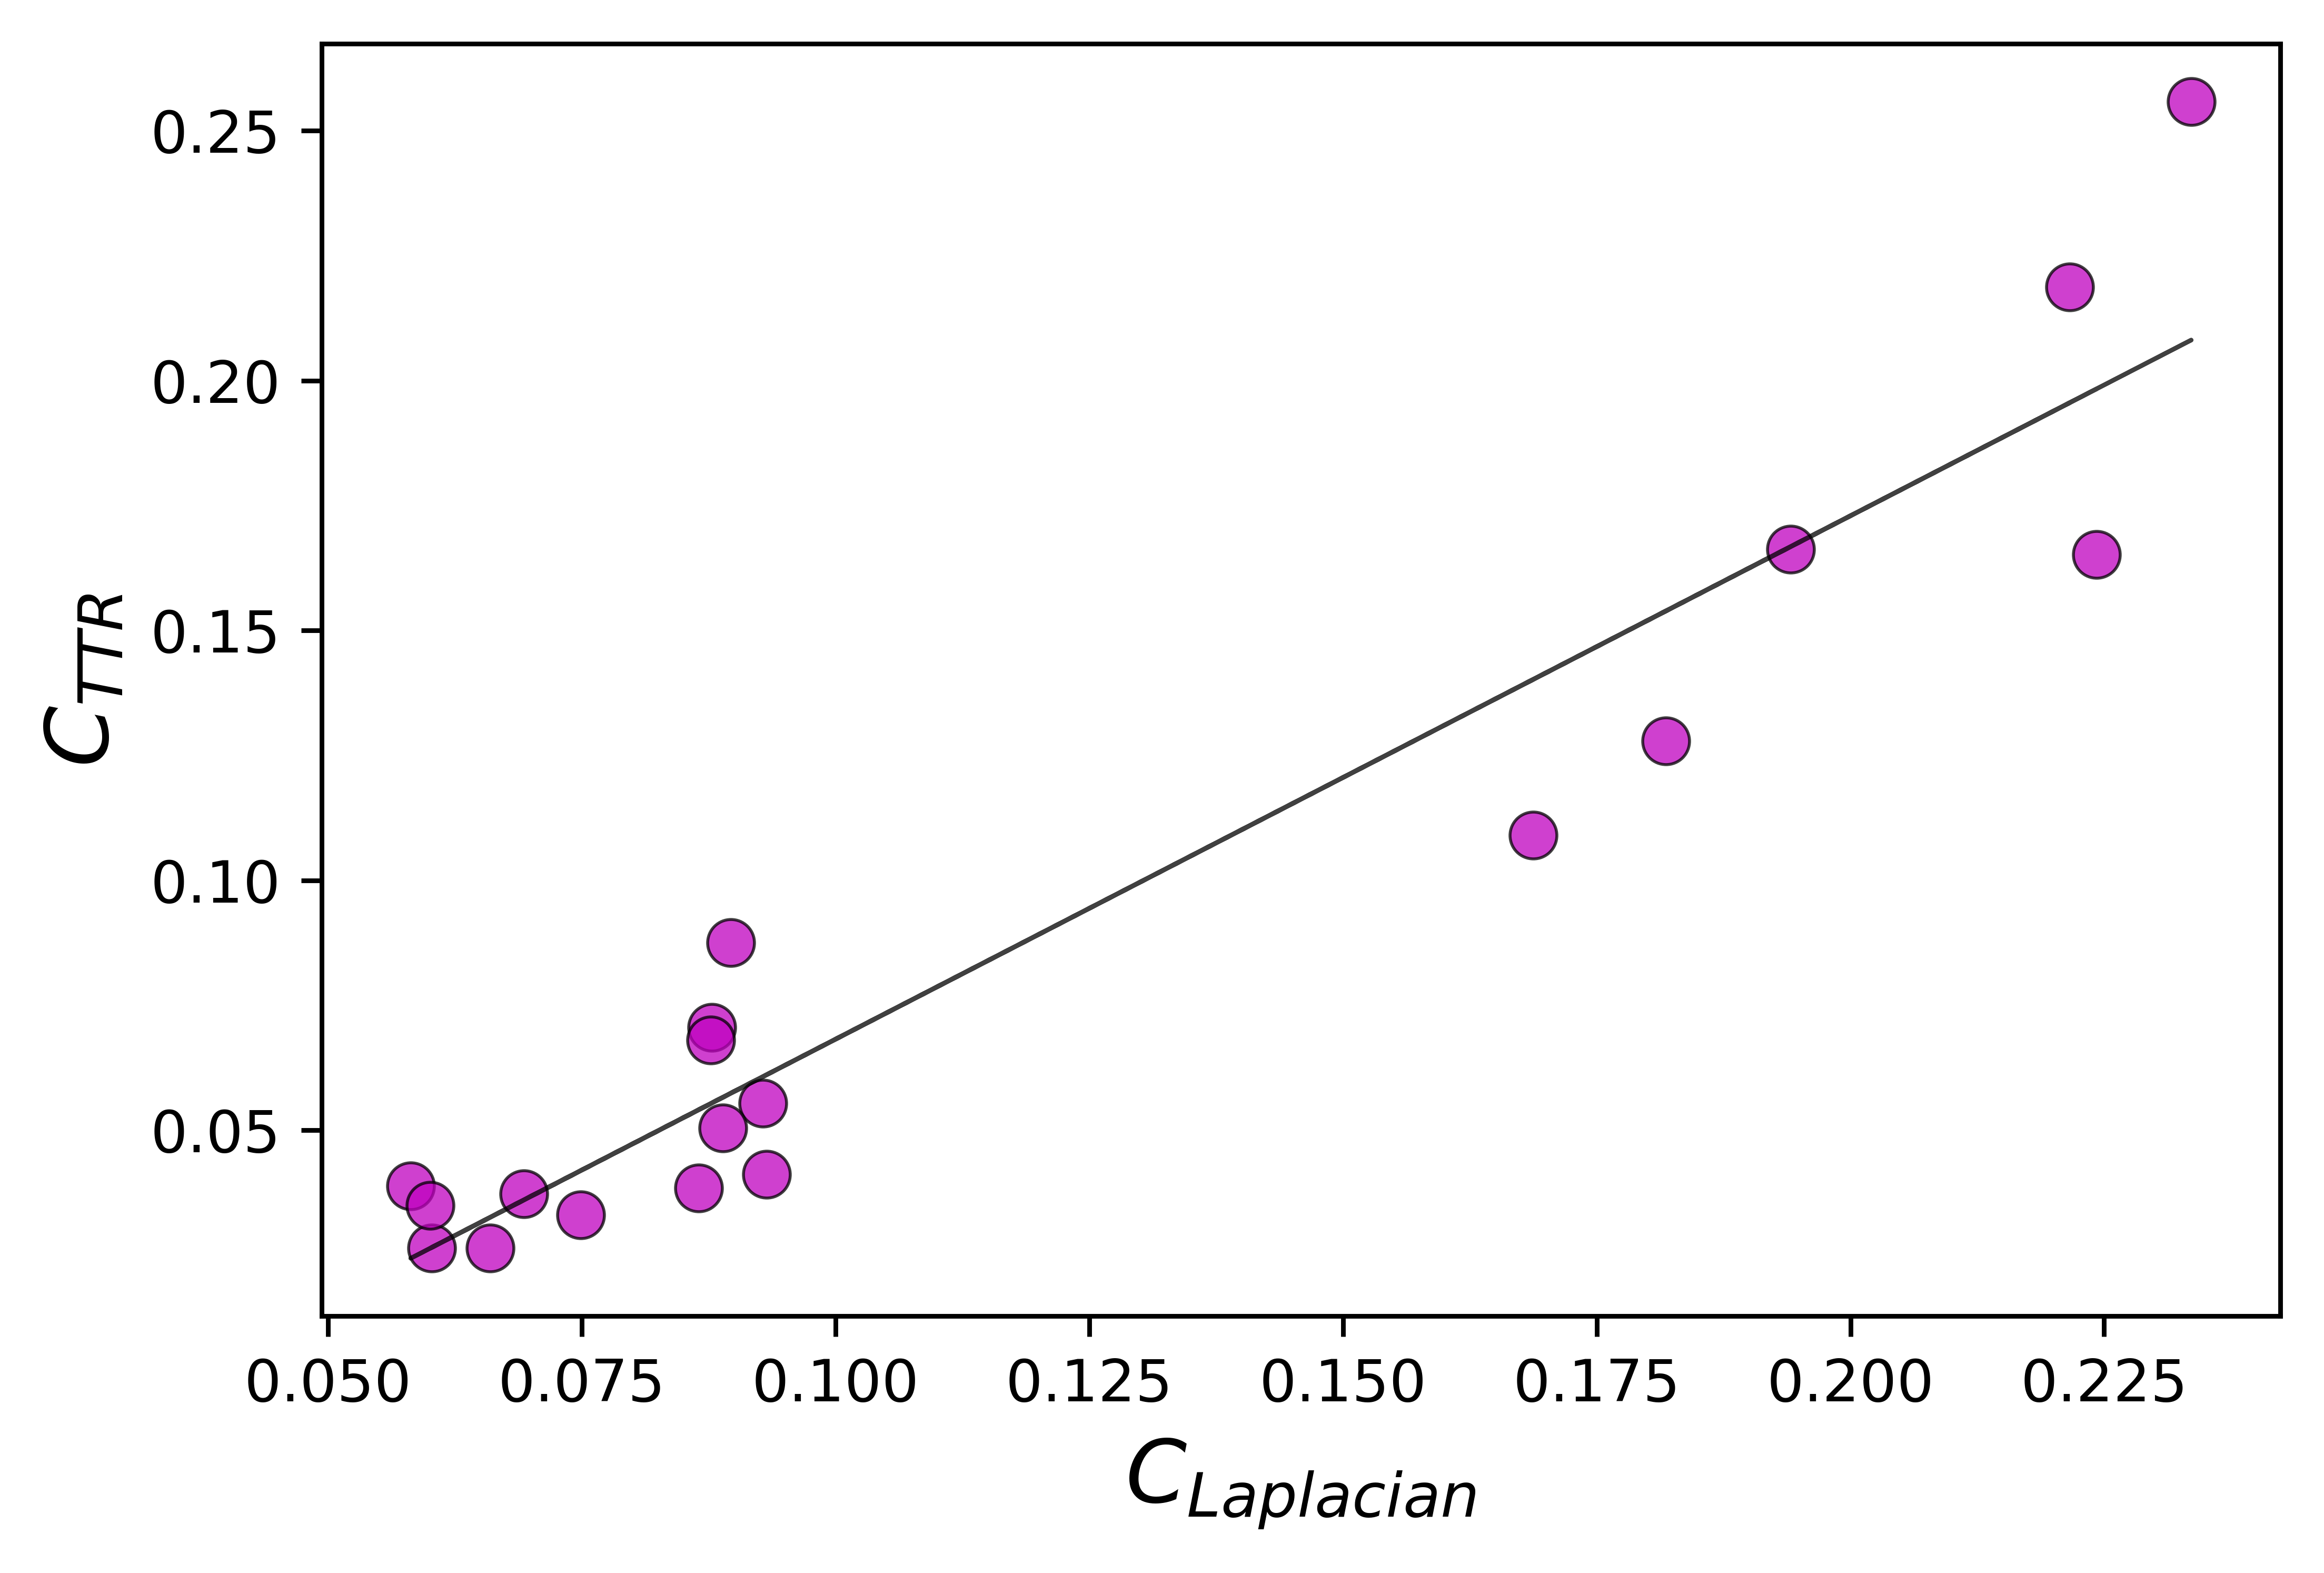

In [29]:
cmap = plt.get_cmap('RdBu')

fig, ax = plt.subplots(dpi=800)

from sklearn.linear_model import LinearRegression

x = np.array(list(E_adj.values())).reshape((-1, 1))
y = np.array(list(TTR_languages.values()))

model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print(r_sq)
y_pred = model.predict(x)

ax.plot(list(E_adj.values()),list(TTR_languages.values()),'o',color='m',markersize=8,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True)
ax.plot(x,y_pred,color='k',linewidth=0.75,alpha=0.75,fillstyle='full',clip_on=True)

plt.grid(False)
#plt.legend(loc='best')
#plt.xlim([-4.25,7.25])
#plt.ylim([-1.75,2.25])
plt.ylabel(r'$C_{TTR}$',fontsize=15)
plt.xlabel(r'$C_{Laplacian}$',fontsize=15)
plt.rcParams.update({'font.size': 10})
plt.savefig('corr_adj_TTR.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [30]:
spearmanr(list(E_adj.values()),list(TTR_languages.values()))

SpearmanrResult(correlation=0.8964912280701753, pvalue=2.0523092236433137e-07)

## clustering

In [31]:
clustering={}
for language in languages.keys():
    print(language)
    clustering[language]=nx.average_clustering(graphs_adj[language])

Achuar
Aguaruna
Akawaio
Amuzgo
Cabecar
Cakchiquel
Cherokee
Chinantec
English
Jakalteko
Kiche
Mam
Nahuatl
Ojibwa
Qeqchi
Quichua
Shuar
Spanish
Uspanteco


In [32]:
clustering

{'Achuar': 0.24596368501026,
 'Aguaruna': 0.163279395922505,
 'Akawaio': 0.6002332758574196,
 'Amuzgo': 0.5403918074500695,
 'Cabecar': 0.48350015465689544,
 'Cakchiquel': 0.7216012423607571,
 'Cherokee': 0.2598515239067719,
 'Chinantec': 0.6426963391441742,
 'English': 0.5847285603329033,
 'Jakalteko': 0.48652368777727295,
 'Kiche': 0.5836150162026227,
 'Mam': 0.4412406437273478,
 'Nahuatl': 0.5621220673578633,
 'Ojibwa': 0.2086054918398407,
 'Qeqchi': 0.612837466692193,
 'Quichua': 0.22798196291488396,
 'Shuar': 0.24799836380357468,
 'Spanish': 0.46881545966241595,
 'Uspanteco': 0.49768296216127933}

In [110]:
clustering_degree={}
for language in languages.keys():
    print(language)
    G=graphs_adj[language]
    clustering_degree[language]=[dict(nx.clustering(G)),dict(G.degree())]

Achuar
Aguaruna
Akawaio
Amuzgo
Cabecar
Cakchiquel
Cherokee
Chinantec
English
Jakalteko
Kiche
Mam
Nahuatl
Ojibwa
Qeqchi
Quichua
Shuar
Spanish
Uspanteco


In [143]:
import collections

def merge(language):
    D={key:[] for key in set(list(clustering_degree[language][1].values()))}
    for word in list(clustering_degree[language][1].keys()):
        D[clustering_degree[language][1][word]]+=[clustering_degree[language][0][word]]
    D={key:np.mean(D[key]) for key in D.keys() if key>1}
    D=dict(collections.OrderedDict(sorted(D.items())))
    return D

In [164]:
merge('Aguaruna')

{2: 0.18076285240464346,
 3: 0.1949685534591195,
 4: 0.17107448575443976,
 5: 0.18680555555555556,
 6: 0.16250409701737134,
 7: 0.18994708994708992,
 8: 0.15687160940325498,
 9: 0.1752125850340136,
 10: 0.14835779175401814,
 11: 0.13566433566433567,
 12: 0.1551797040169133,
 13: 0.1741786858974359,
 14: 0.14705614020682514,
 15: 0.14696545284780577,
 16: 0.1529126213592233,
 17: 0.14615003304692661,
 18: 0.12998457810090328,
 19: 0.142445666404818,
 20: 0.1251716247139588,
 21: 0.11527777777777777,
 22: 0.13543599257884972,
 23: 0.12611453258571562,
 24: 0.14644421975058985,
 25: 0.13313725490196077,
 26: 0.11729410535117057,
 27: 0.11995284409077514,
 28: 0.1249055177626606,
 29: 0.1330049261083744,
 30: 0.10839428770463252,
 31: 0.09840860215053765,
 32: 0.11299088359046285,
 33: 0.10880681818181817,
 34: 0.1062543594512904,
 35: 0.10756302521008404,
 36: 0.11984126984126985,
 37: 0.12087087087087087,
 38: 0.12507620402357242,
 39: 0.1043859649122807,
 40: 0.10588235294117648,
 41: 0

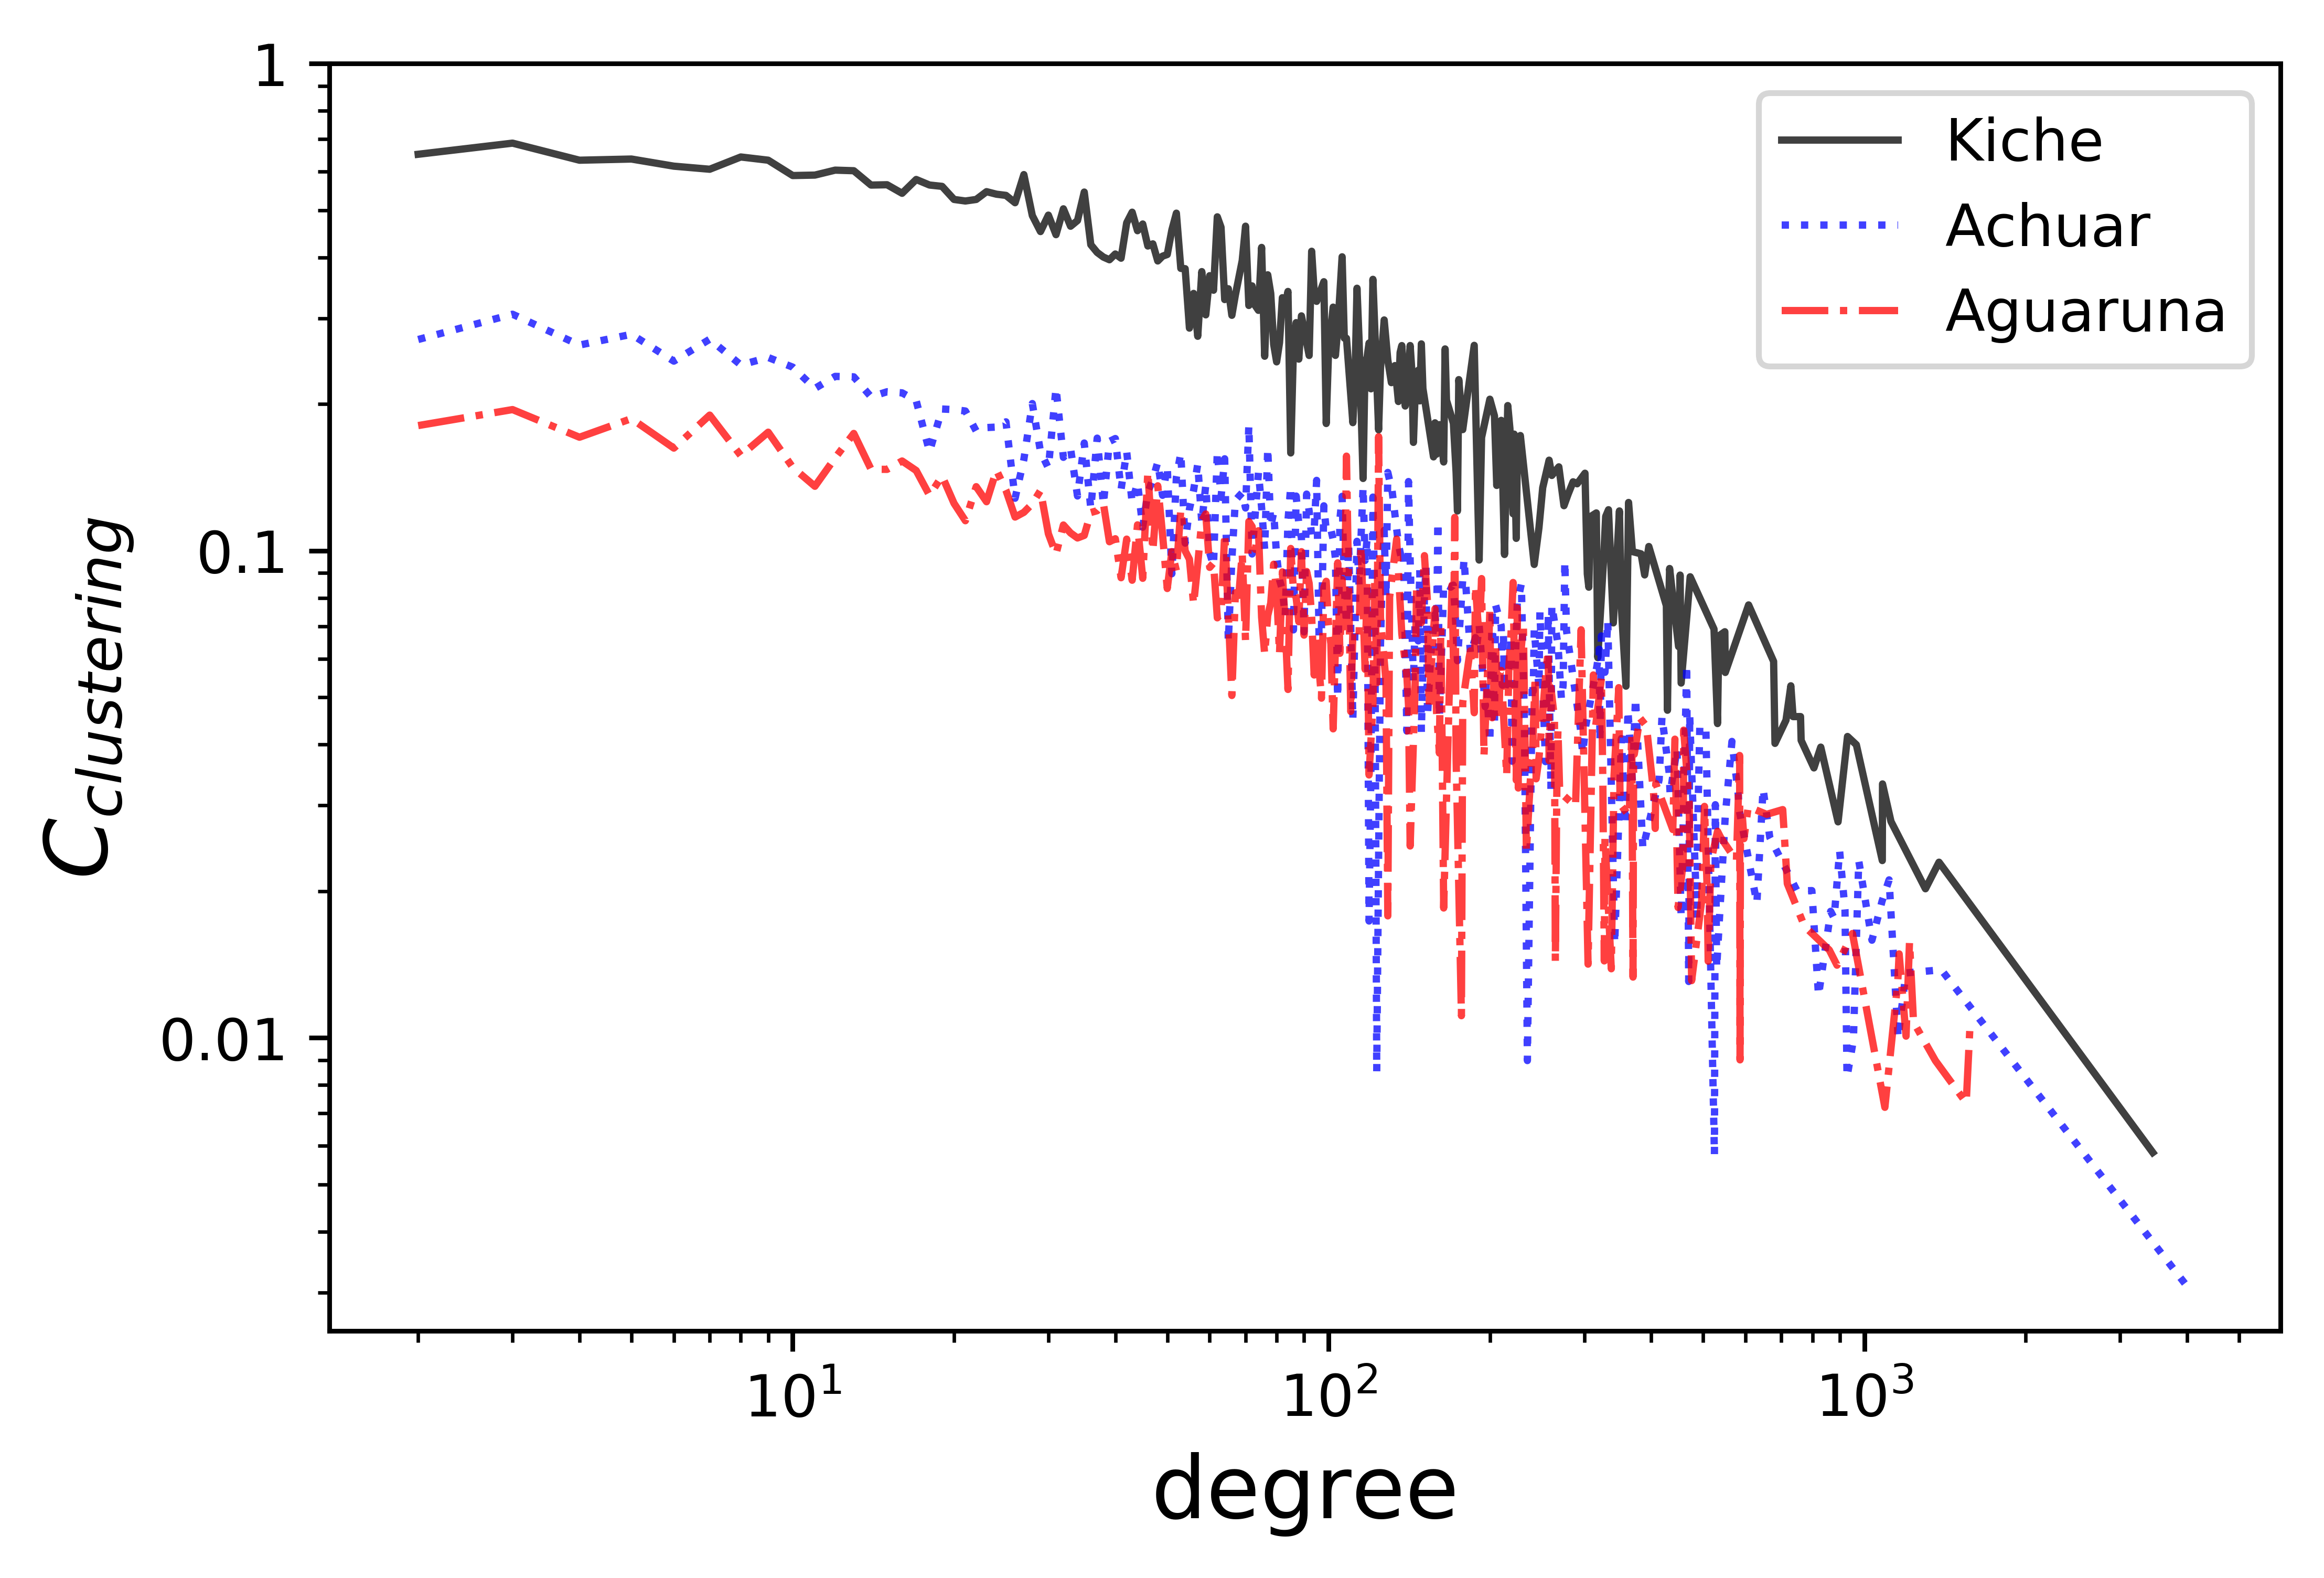

In [162]:
cmap = plt.get_cmap('RdBu')

fig, ax = plt.subplots(dpi=800)
import matplotlib.ticker as ticker
import numpy as np

x = merge('Kiche').keys()
y = merge('Kiche').values()

#ax.loglog(list(clustering_degree['Kiche'][1].values()),list(clustering_degree['Kiche'][0].values()),'o',color='m',markersize=4,markeredgewidth=0.25,markeredgecolor='m',alpha=0.75,fillstyle='none',clip_on=True)
ax.loglog(x,y,color='k',linewidth=1.25,linestyle='solid',alpha=0.75,fillstyle='full',clip_on=True,label='Kiche')

x = merge('Achuar').keys()
y = merge('Achuar').values()

#ax.loglog(list(clustering_degree['Aguaruna'][1].values()),list(clustering_degree['Aguaruna'][0].values()),'D',color='orange',markersize=4,markeredgewidth=0.25,markeredgecolor='m',alpha=0.75,fillstyle='none',clip_on=True)
ax.loglog(x,y,color='b',linewidth=1.25,linestyle='dotted',alpha=0.75,fillstyle='full',clip_on=True,label='Achuar')

x = merge('Aguaruna').keys()
y = merge('Aguaruna').values()

#ax.loglog(list(clustering_degree['Aguaruna'][1].values()),list(clustering_degree['Aguaruna'][0].values()),'D',color='orange',markersize=4,markeredgewidth=0.25,markeredgecolor='m',alpha=0.75,fillstyle='none',clip_on=True)
ax.loglog(x,y,color='r',linewidth=1.25,linestyle='dashdot',alpha=0.75,fillstyle='full',clip_on=True,label='Aguaruna')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))

plt.grid(False)
plt.legend(loc='best')
#plt.xlim([-4.25,7.25])
plt.ylim([0.0025,1])
plt.ylabel(r'$C_{clustering}$',fontsize=15)
plt.xlabel(r'degree',fontsize=15)
plt.rcParams.update({'font.size': 10})
plt.savefig('clustering_degree.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [33]:
pickle.dump(clustering,open('clustering.p','wb'))

In [34]:
clustering=pickle.load(open('clustering.p','rb'))

0.9282739926800915


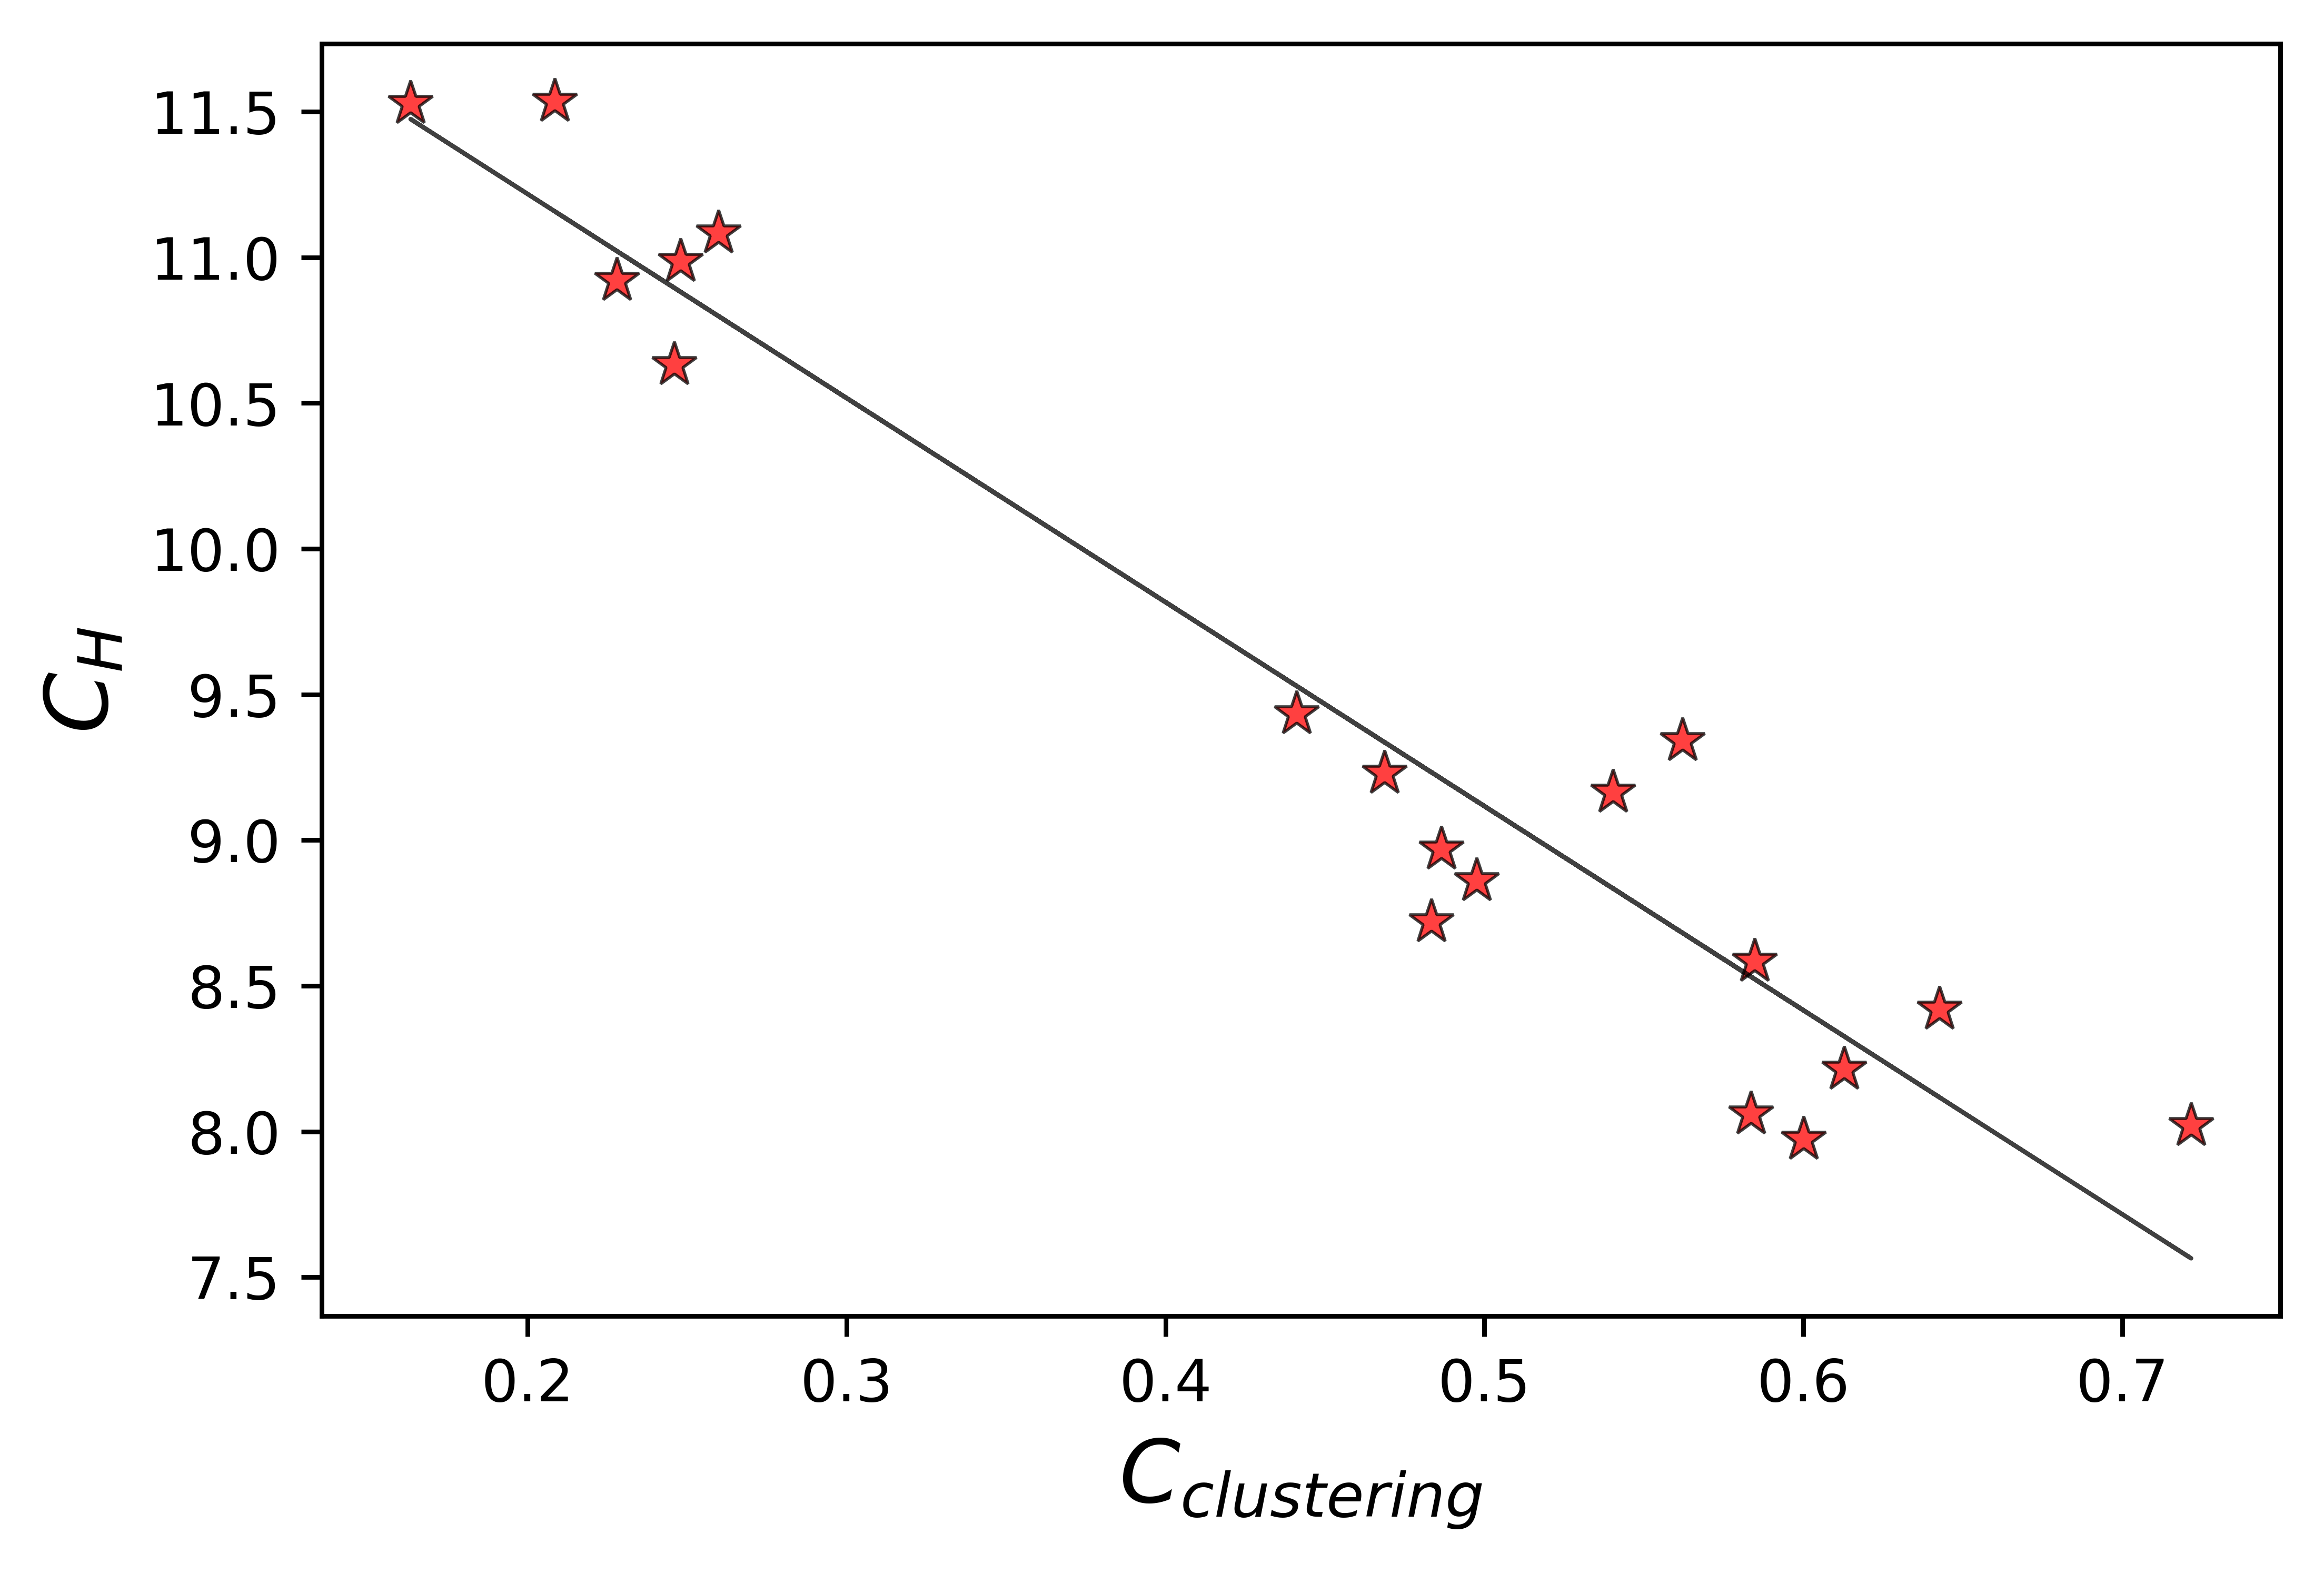

In [35]:
cmap = plt.get_cmap('RdBu')

fig, ax = plt.subplots(dpi=800)

from sklearn.linear_model import LinearRegression

x = np.array(list(clustering.values())).reshape((-1, 1))
y = np.array(list(entropy_languages.values()))

model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print(r_sq)
y_pred = model.predict(x)

ax.plot(list(clustering.values()),list(entropy_languages.values()),'*',color='r',markersize=8,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True)
ax.plot(x,y_pred,color='k',linewidth=0.75,alpha=0.75,fillstyle='full',clip_on=True)

plt.grid(False)
#plt.legend(loc='best')
#plt.xlim([-4.25,7.25])
#plt.ylim([-1.75,2.25])
plt.ylabel(r'$C_{H}$',fontsize=15)
plt.xlabel(r'$C_{clustering}$',fontsize=15)
plt.rcParams.update({'font.size': 10})
plt.savefig('corr_clustering_entropy.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [36]:
spearmanr(list(clustering.values()),list(entropy_languages.values()))

SpearmanrResult(correlation=-0.9140350877192982, pvalue=4.50061446114764e-08)

0.7243501652273869


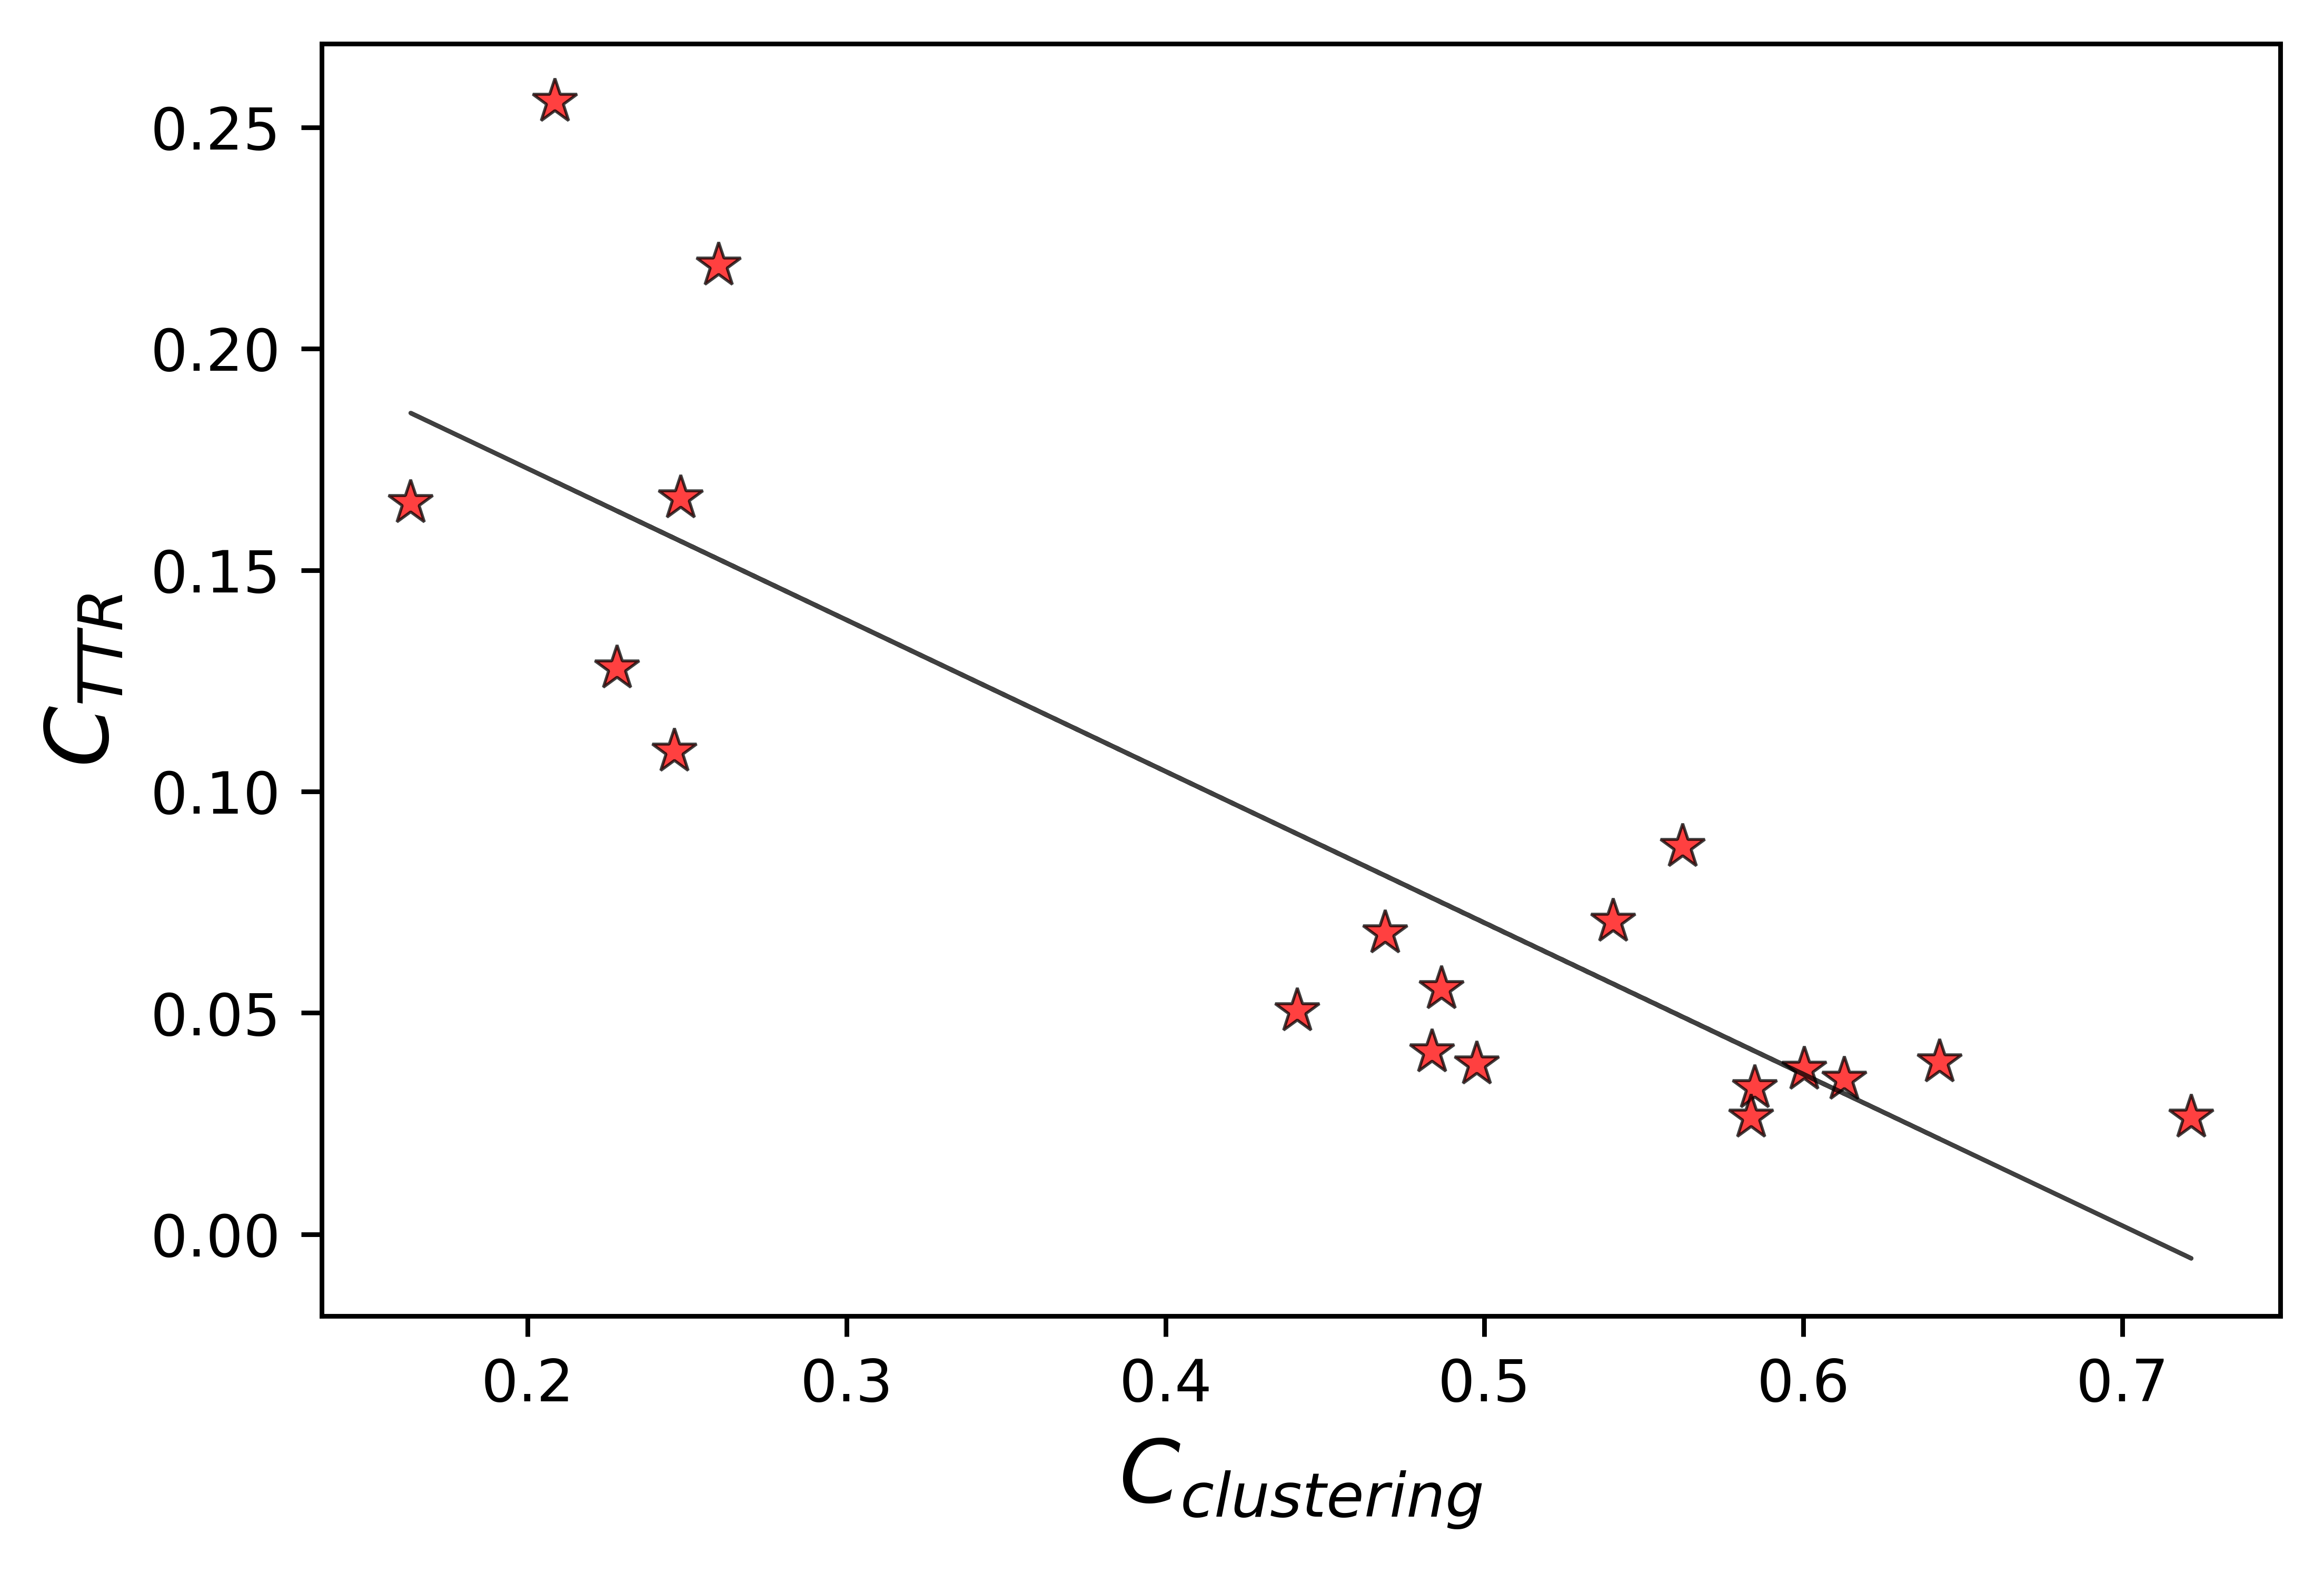

In [37]:
cmap = plt.get_cmap('RdBu')

fig, ax = plt.subplots(dpi=800)

from sklearn.linear_model import LinearRegression

x = np.array(list(clustering.values())).reshape((-1, 1))
y = np.array(list(TTR_languages.values()))

model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print(r_sq)
y_pred = model.predict(x)

ax.plot(list(clustering.values()),list(TTR_languages.values()),'*',color='r',markersize=8,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True)
ax.plot(x,y_pred,color='k',linewidth=0.75,alpha=0.75,fillstyle='full',clip_on=True)

plt.grid(False)
#plt.legend(loc='best')
#plt.xlim([-4.25,7.25])
#plt.ylim([-1.75,2.25])
plt.ylabel(r'$C_{TTR}$',fontsize=15)
plt.xlabel(r'$C_{clustering}$',fontsize=15)
plt.rcParams.update({'font.size': 10})
plt.savefig('corr_clustering_TTR.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [38]:
spearmanr(list(clustering.values()),list(TTR_languages.values()))

SpearmanrResult(correlation=-0.8491228070175438, pvalue=4.269691764351799e-06)

## complexity space

0.8962971329304685


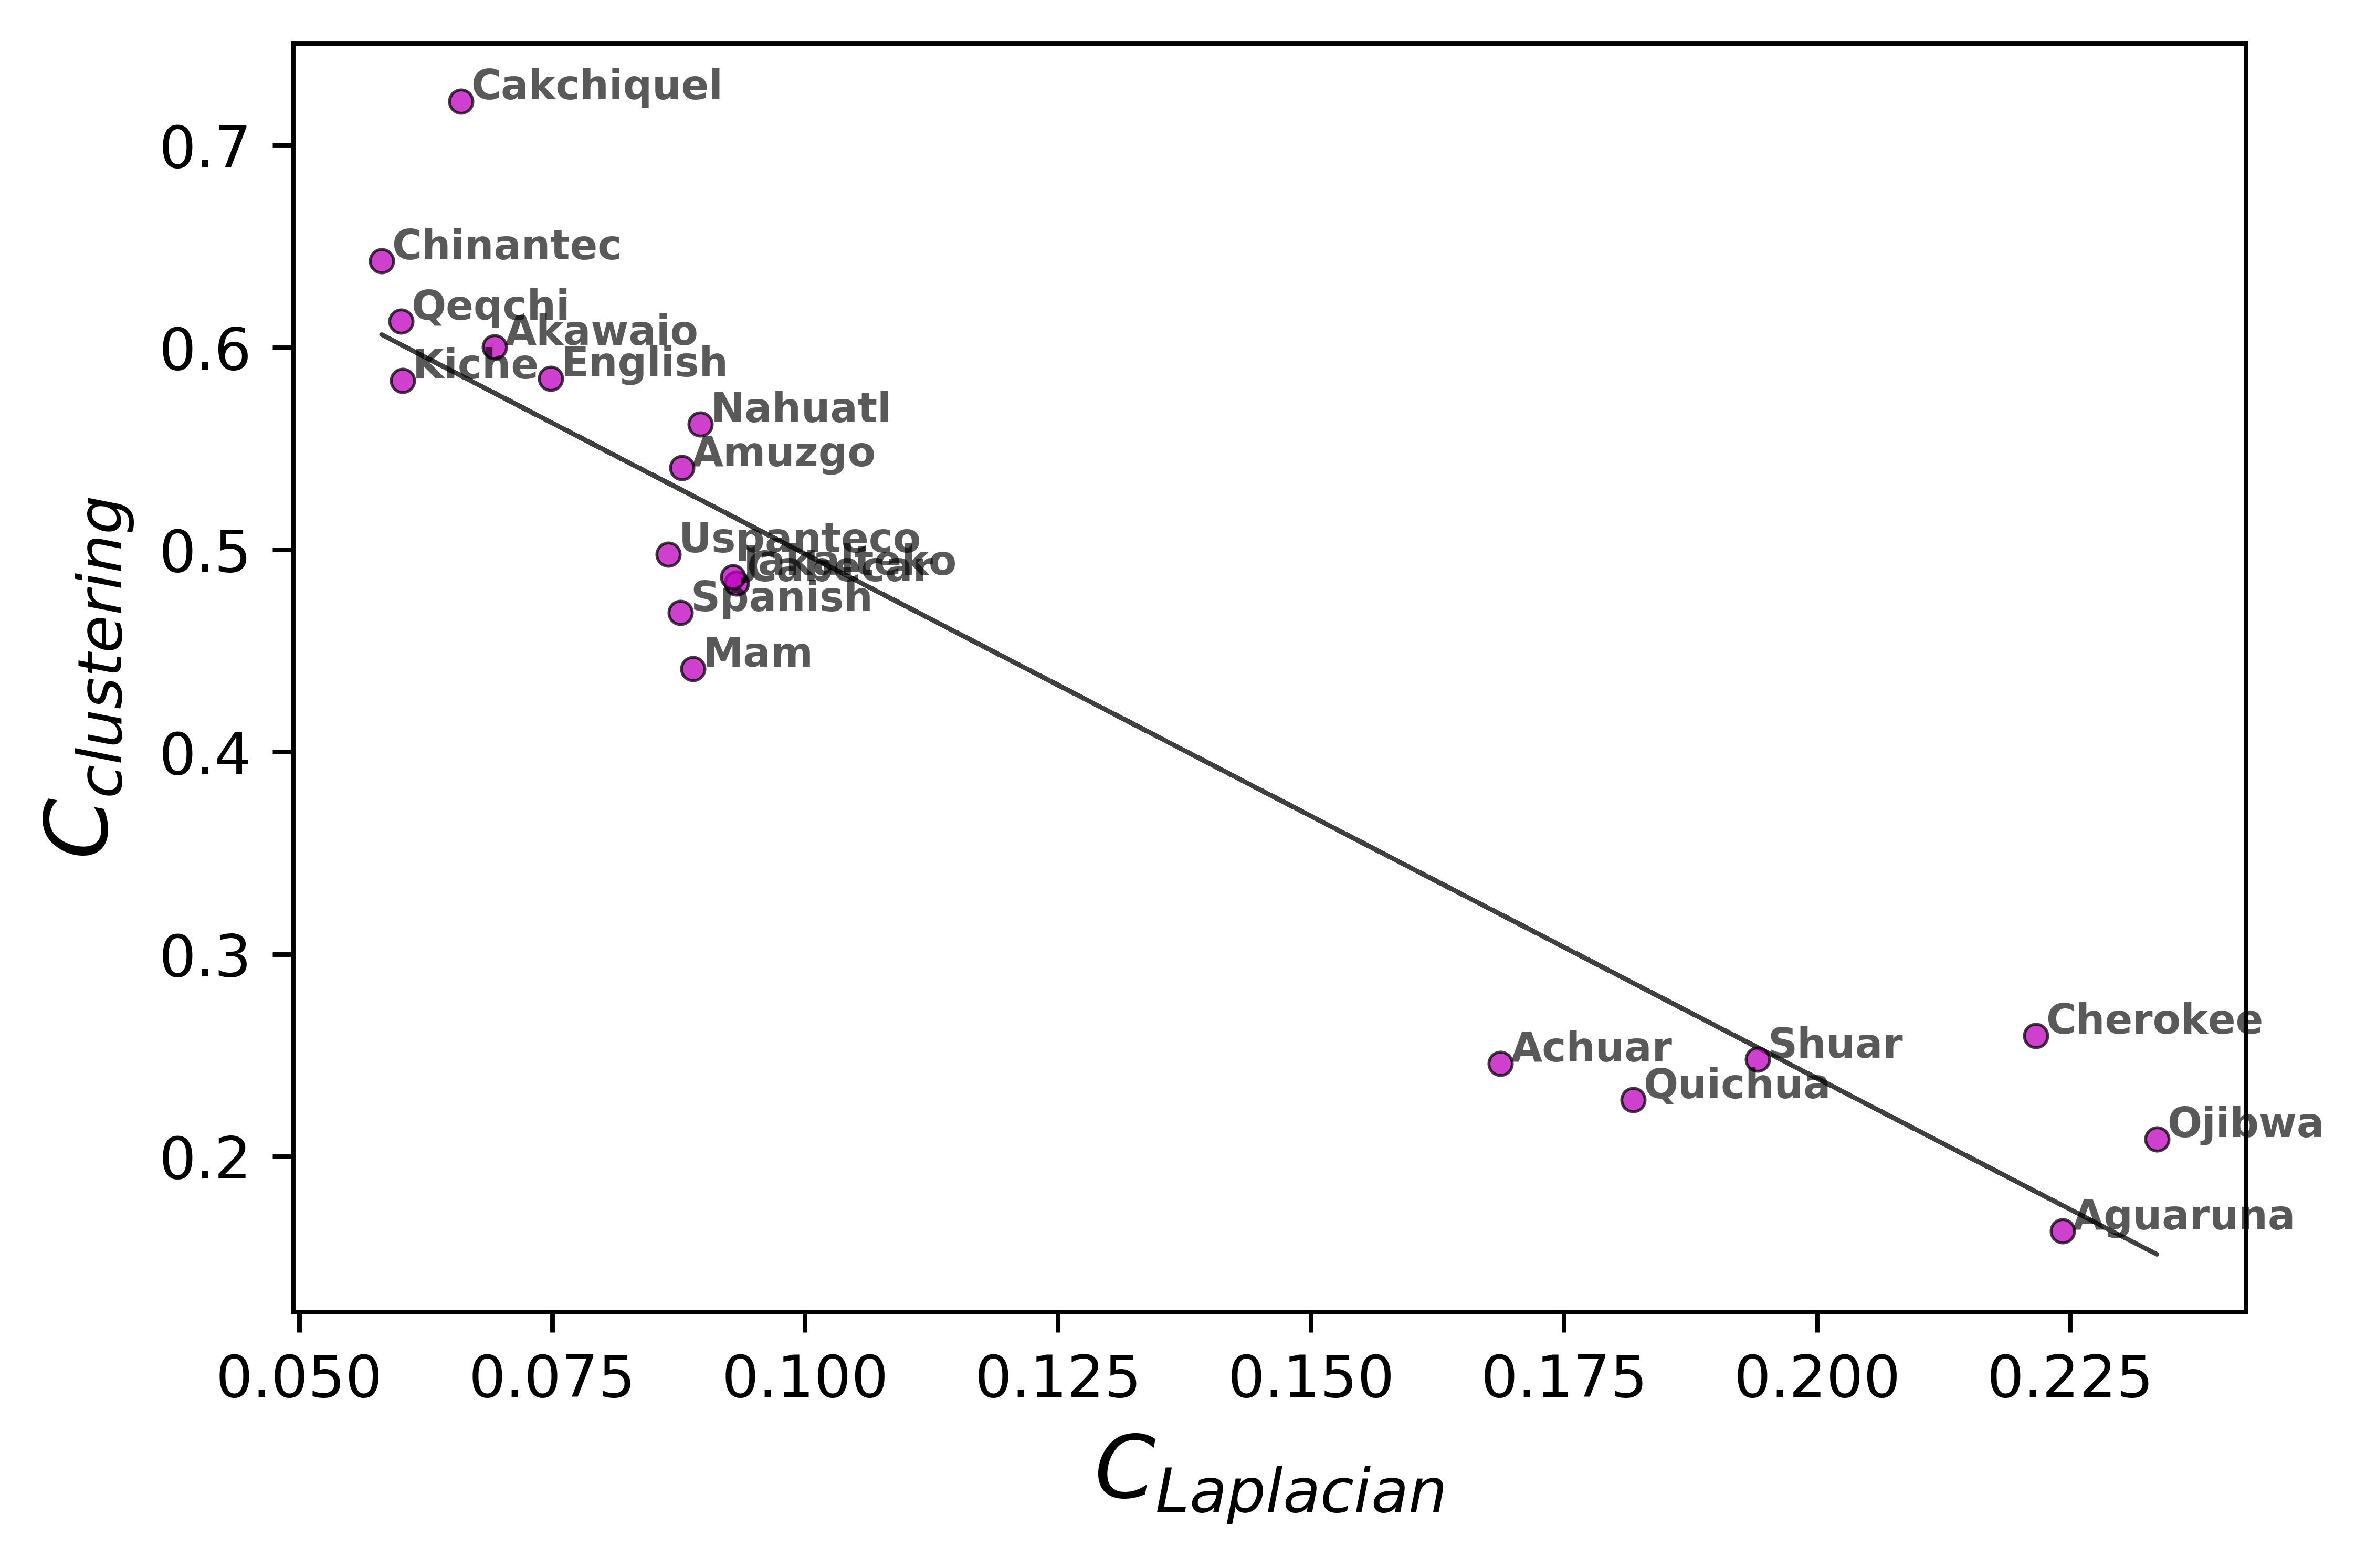

In [83]:
cmap = plt.get_cmap('RdBu')

fig, ax = plt.subplots(dpi=800)

from sklearn.linear_model import LinearRegression

x = np.array(list(E_adj.values())).reshape((-1, 1))
y = np.array(list(clustering.values()))

model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print(r_sq)
y_pred = model.predict(x)

ax.plot(x,y_pred,color='k',linewidth=0.75,alpha=0.75,fillstyle='full',clip_on=True)

for language in languages.keys():
    x=E_adj[language]
    y=clustering[language]

    ax.plot(x,y,marker='o',color='m',markersize=4,markeredgecolor='k',markeredgewidth=0.5,alpha=0.75,fillstyle='full',clip_on=True)
    ax.annotate(language, weight='demi', color='k', xy=(x+0.001,y+0.001), fontsize=7, alpha=0.65)

plt.grid(False)
#plt.legend(loc='best')
#plt.xlim([-4.25,7.25])
#plt.ylim([-1.75,2.25])
plt.ylabel(r'$C_{clustering}$',fontsize=15)
plt.xlabel(r'$C_{Laplacian}$',fontsize=15)
plt.rcParams.update({'font.size': 10})
plt.savefig('complexity.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [84]:
overall={}
for language in languages.keys():
    overall[language]=E_adj[language]/float(max(list(E_adj.values())))+clustering[language]/float(max(list(clustering.values())))

In [85]:
overall

{'Achuar': 1.0632518964848159,
 'Aguaruna': 1.1863390978721835,
 'Akawaio': 1.128634049694802,
 'Amuzgo': 1.1249024998390467,
 'Cabecar': 1.0692105286789515,
 'Cakchiquel': 1.282576522577194,
 'Cherokee': 1.3089173611667602,
 'Chinantec': 1.1396110631518188,
 'English': 1.1309619602897796,
 'Jakalteko': 1.0718835306764172,
 'Kiche': 1.0666036211355547,
 'Mam': 0.9921635662705139,
 'Nahuatl': 1.1628937654573854,
 'Ojibwa': 1.2890869355454222,
 'Qeqchi': 1.106535003298807,
 'Quichua': 1.0944033796934034,
 'Shuar': 1.1747817416228141,
 'Spanish': 1.0251789893798824,
 'Uspanteco': 1.0600371818904}

In [43]:
sorted_overall = sorted(overall.items(), key=operator.itemgetter(1), reverse=True)

In [44]:
sorted_overall

[('Cherokee', 1.3089173611667602),
 ('Ojibwa', 1.2890869355454222),
 ('Cakchiquel', 1.282576522577194),
 ('Aguaruna', 1.1863390978721835),
 ('Shuar', 1.1747817416228141),
 ('Nahuatl', 1.1628937654573854),
 ('Chinantec', 1.1396110631518188),
 ('English', 1.1309619602897796),
 ('Akawaio', 1.128634049694802),
 ('Amuzgo', 1.1249024998390467),
 ('Qeqchi', 1.106535003298807),
 ('Quichua', 1.0944033796934034),
 ('Jakalteko', 1.0718835306764172),
 ('Cabecar', 1.0692105286789515),
 ('Kiche', 1.0666036211355547),
 ('Achuar', 1.0632518964848159),
 ('Uspanteco', 1.0600371818904),
 ('Spanish', 1.0251789893798824),
 ('Mam', 0.9921635662705139)]

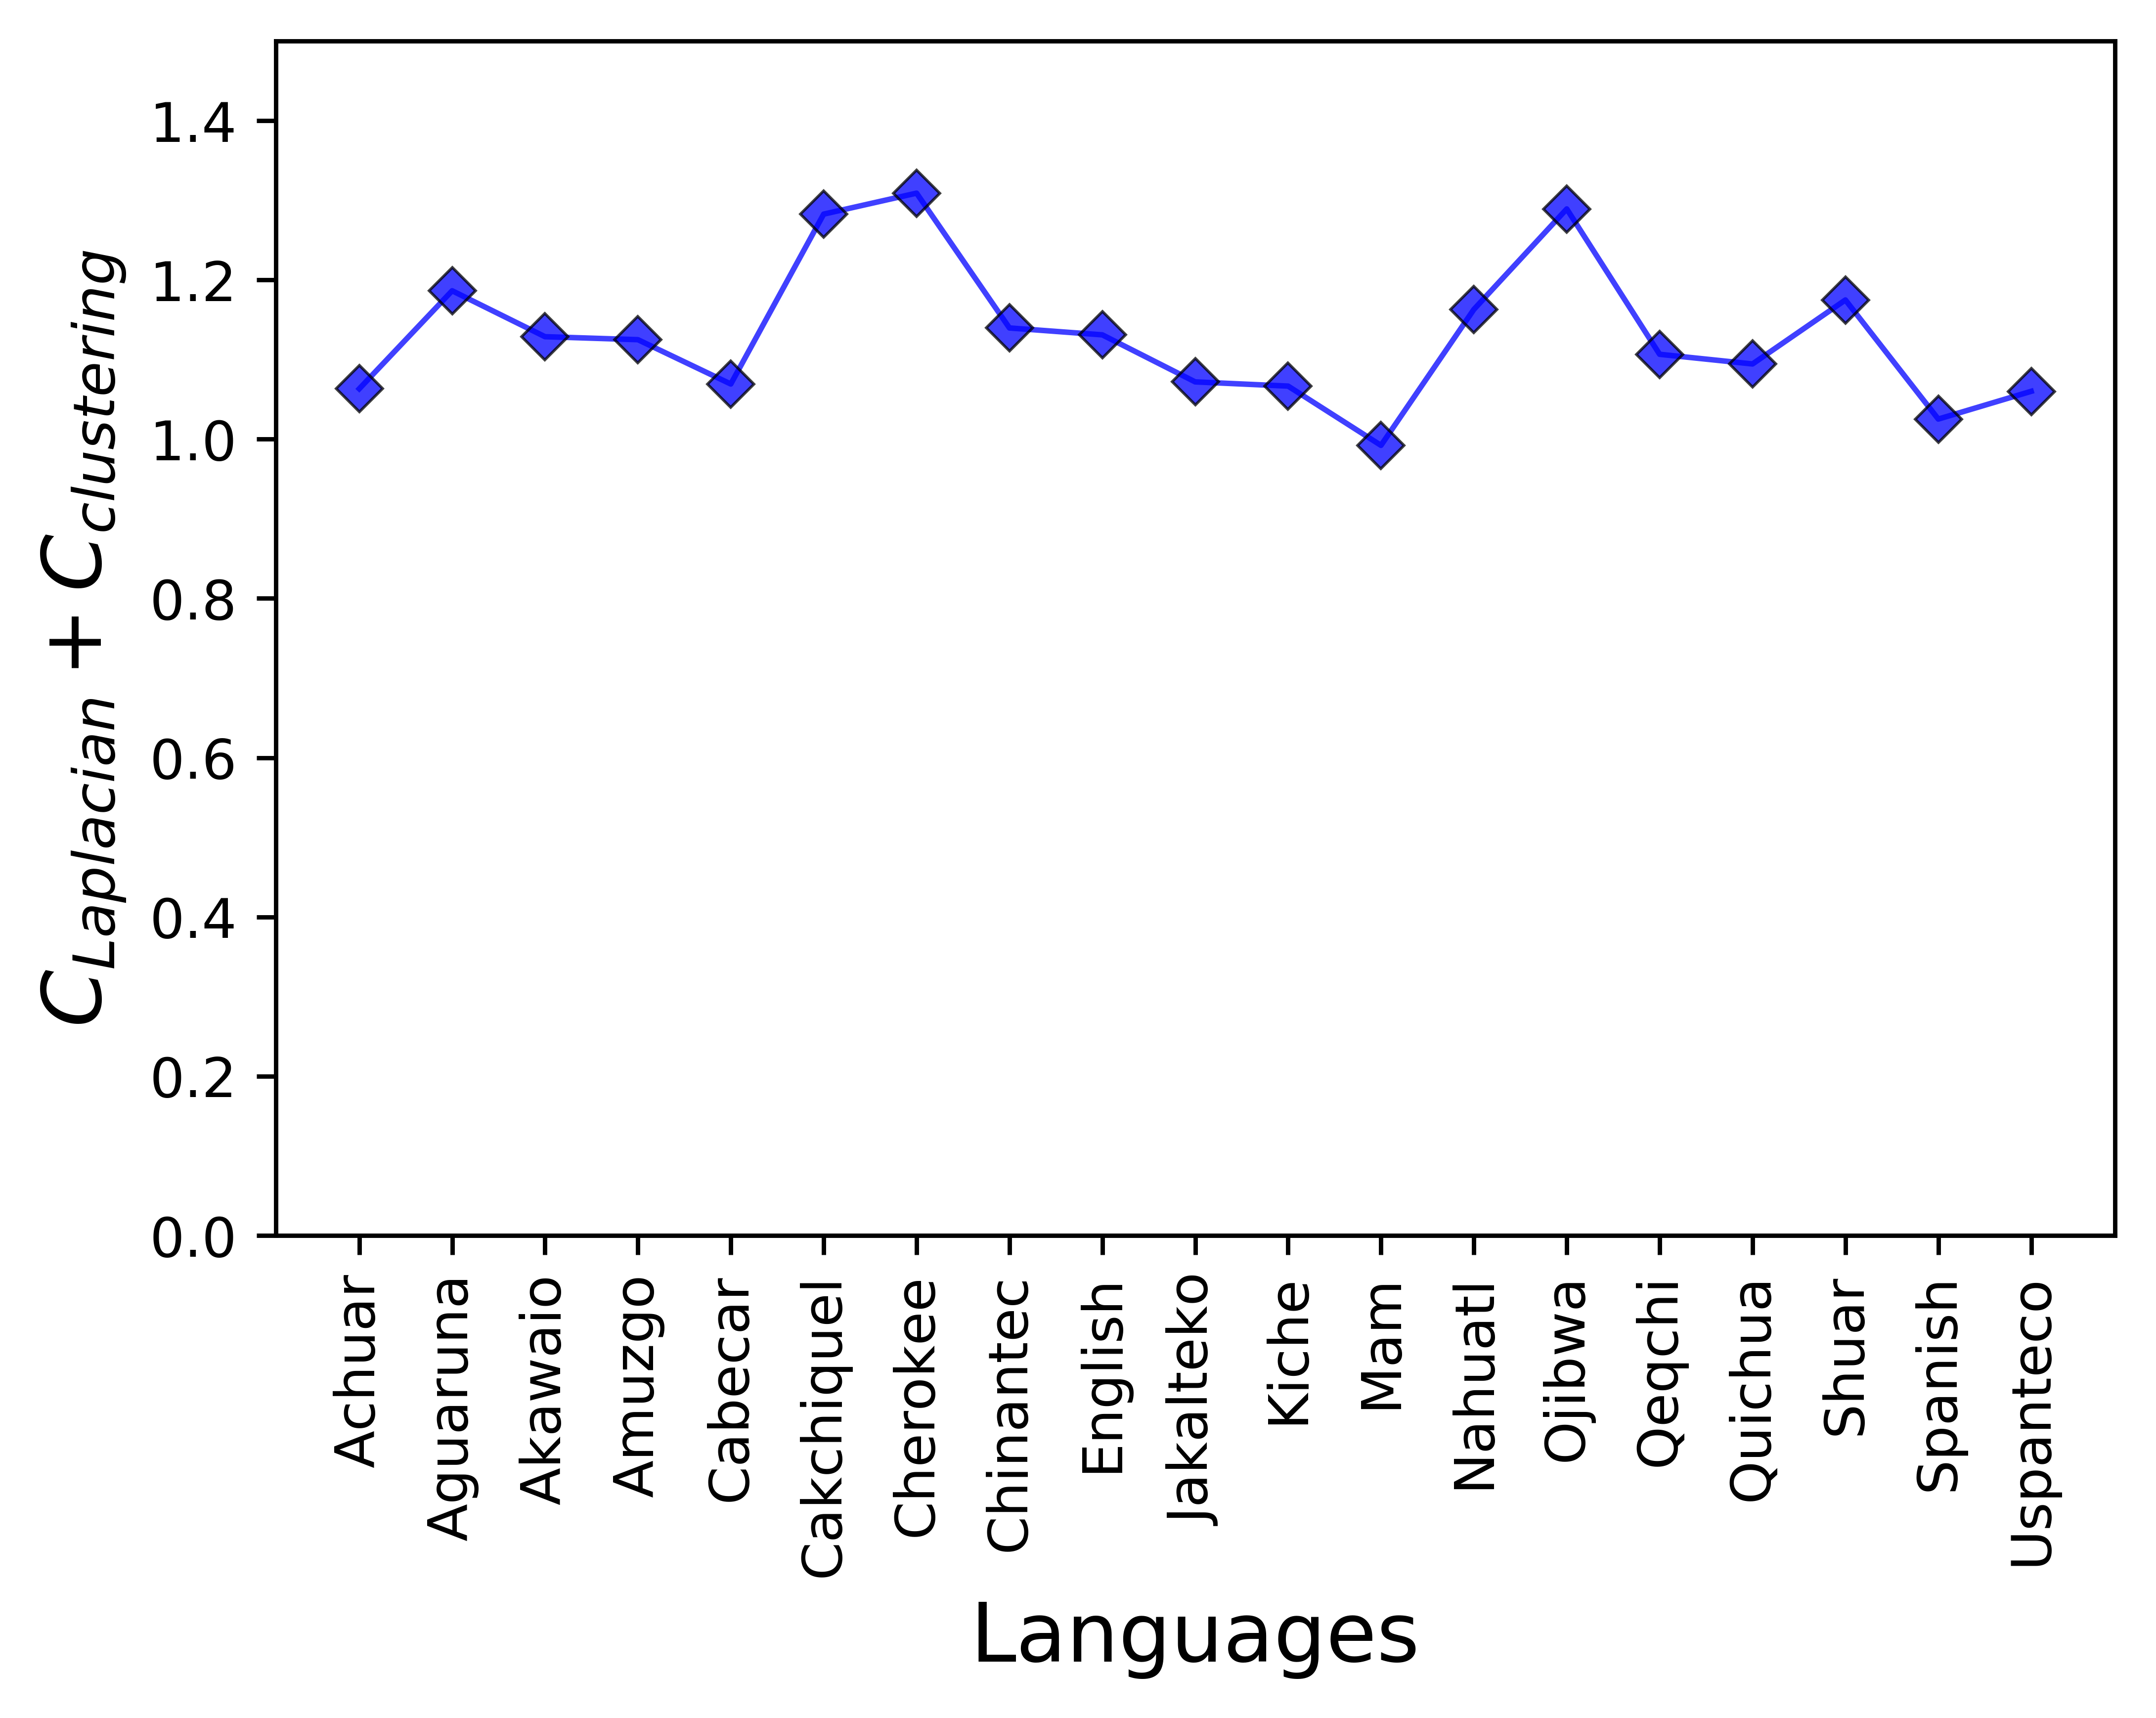

In [153]:
fig, ax = plt.subplots(dpi=800)

names=list(zip(*list(overall.items())))[0]

#plt.plot(range(len(romance_names)),[E_adj[language] for language in romance_names],marker='o',color='r',markersize=6,markeredgecolor='k',markeredgewidth=0.5,fillstyle='full',clip_on=True,linewidth=0.5)
    #ax.annotate(language, weight='demi', color='k', xy=(x+0.003,y+0.003), fontsize=4, alpha=0.5)
ax.plot(range(len(names)),list(zip(*list(overall.items())))[1],marker='D',color='b',linewidth=1,markersize=6,markeredgecolor='k',markeredgewidth=0.5,alpha=0.75,fillstyle='full',clip_on=True)

#plt.bar(range(len(names)),list(zip(*sorted_overall))[1],color='r',width=0.75,edgecolor='k')
plt.xticks(range(len(names)),names, rotation='vertical')

plt.grid(False)
#plt.legend(loc='best')
#plt.xlim([-4.25,7.25])
plt.ylim([0,1.5])
plt.ylabel(r'$C_{Laplacian}+C_{clustering}$',fontsize=15)
plt.xlabel(r'Languages',fontsize=15)
plt.rcParams.update({'font.size': 10})
plt.savefig('ranking.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [41]:
list(zip(*sorted_overall))[1]

(0.38443293369241704,
 0.3475627110310253,
 0.34263550650191477,
 0.3384795504410768,
 0.31310532220419923,
 0.30931558377245777,
 0.2860332006303769,
 0.27763389342915185,
 0.26935044831648464,
 0.26437212879865846,
 0.24578619009364383,
 0.2454805949262285,
 0.23901735136483715,
 0.2285182964759561,
 0.20972807514505964,
 0.19175869660703793,
 0.17532676118426194,
 0.16997373381890987,
 0.16649688030102022)

## modularity

In [55]:
partition_adj={}
for language in languages.keys():
    print(language)
    G=graphs_adj[language]
    #G.remove_edges_from(nx.selfloop_edges(G))
    #G=nx.k_core(G)
    partition_adj[language]=nx.average_clustering(G)#community.modularity(community.best_partition(G),G)

Achuar
Aguaruna
Akawaio
Amuzgo
Cabecar
Cakchiquel
Cherokee
Chinantec
English
Jakalteko
Kiche
Mam
Nahuatl
Ojibwa
Qeqchi
Quichua
Shuar
Spanish
Uspanteco


In [43]:
partition_word={}
for language in languages.keys():
    print(language)
    partition_word[language]=community.modularity(community.best_partition(wordform_networks[language]),wordform_networks[language])

Achuar
Aguaruna
Akawaio
Amuzgo
Cabecar
Cakchiquel
Cherokee
Chinantec
English
Jakalteko
Kiche
Mam
Nahuatl
Ojibwa
Qeqchi
Quichua
Shuar
Spanish
Uspanteco


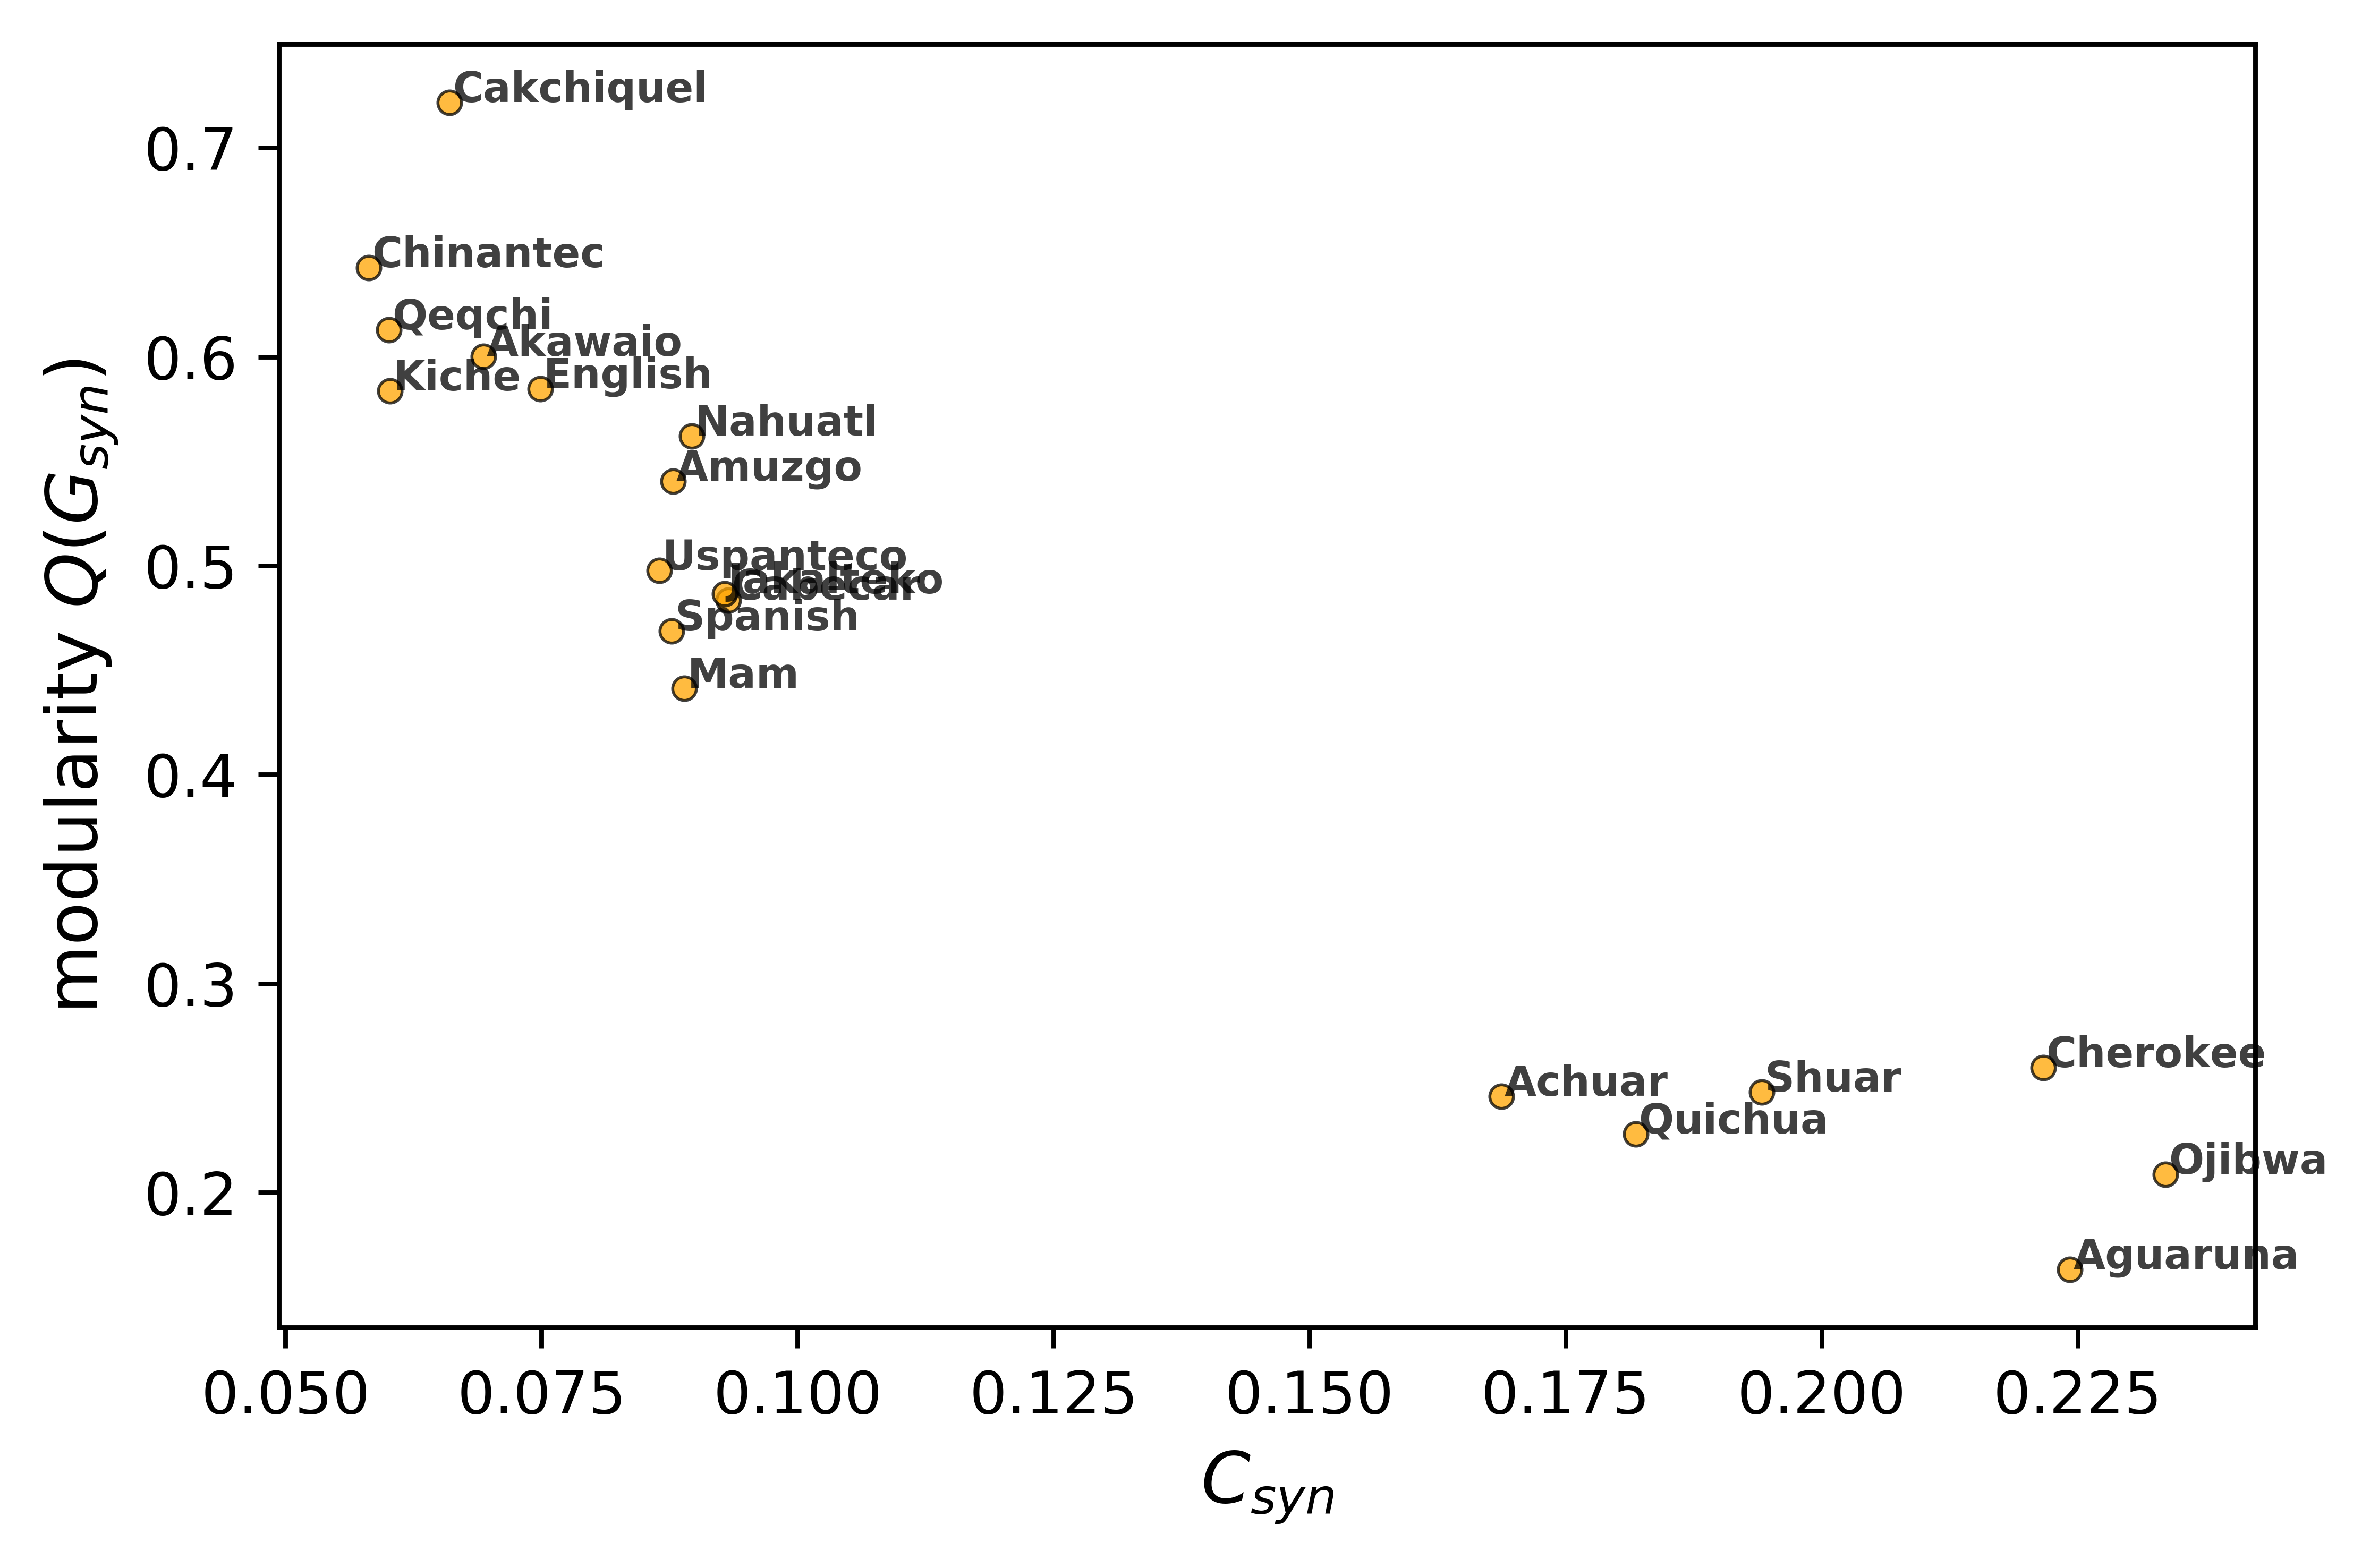

In [56]:
fig, ax = plt.subplots(dpi=800)

from scipy.optimize import curve_fit

X=[]
Y=[]

for language in languages.keys():
    x=E_adj[language]
    y=partition_adj[language]
   
    ax.plot(x,y,marker='o',color='orange',markersize=4,markeredgecolor='k',markeredgewidth=0.5,alpha=0.75,fillstyle='full',clip_on=True)
    ax.annotate(language, weight='demi', color='k', xy=(x+0.0003,y+0.0003), fontsize=7, alpha=0.75)

plt.grid(False)
#plt.legend(loc='best')
#plt.xlim([-4.25,7.25])
#plt.ylim([-1.75,2.25])
plt.ylabel(r'modularity $Q(G_{syn})$',fontsize=12)
plt.xlabel(r'$C_{syn}$',fontsize=12)
plt.rcParams.update({'font.size': 10})
plt.savefig('modularity_adj.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

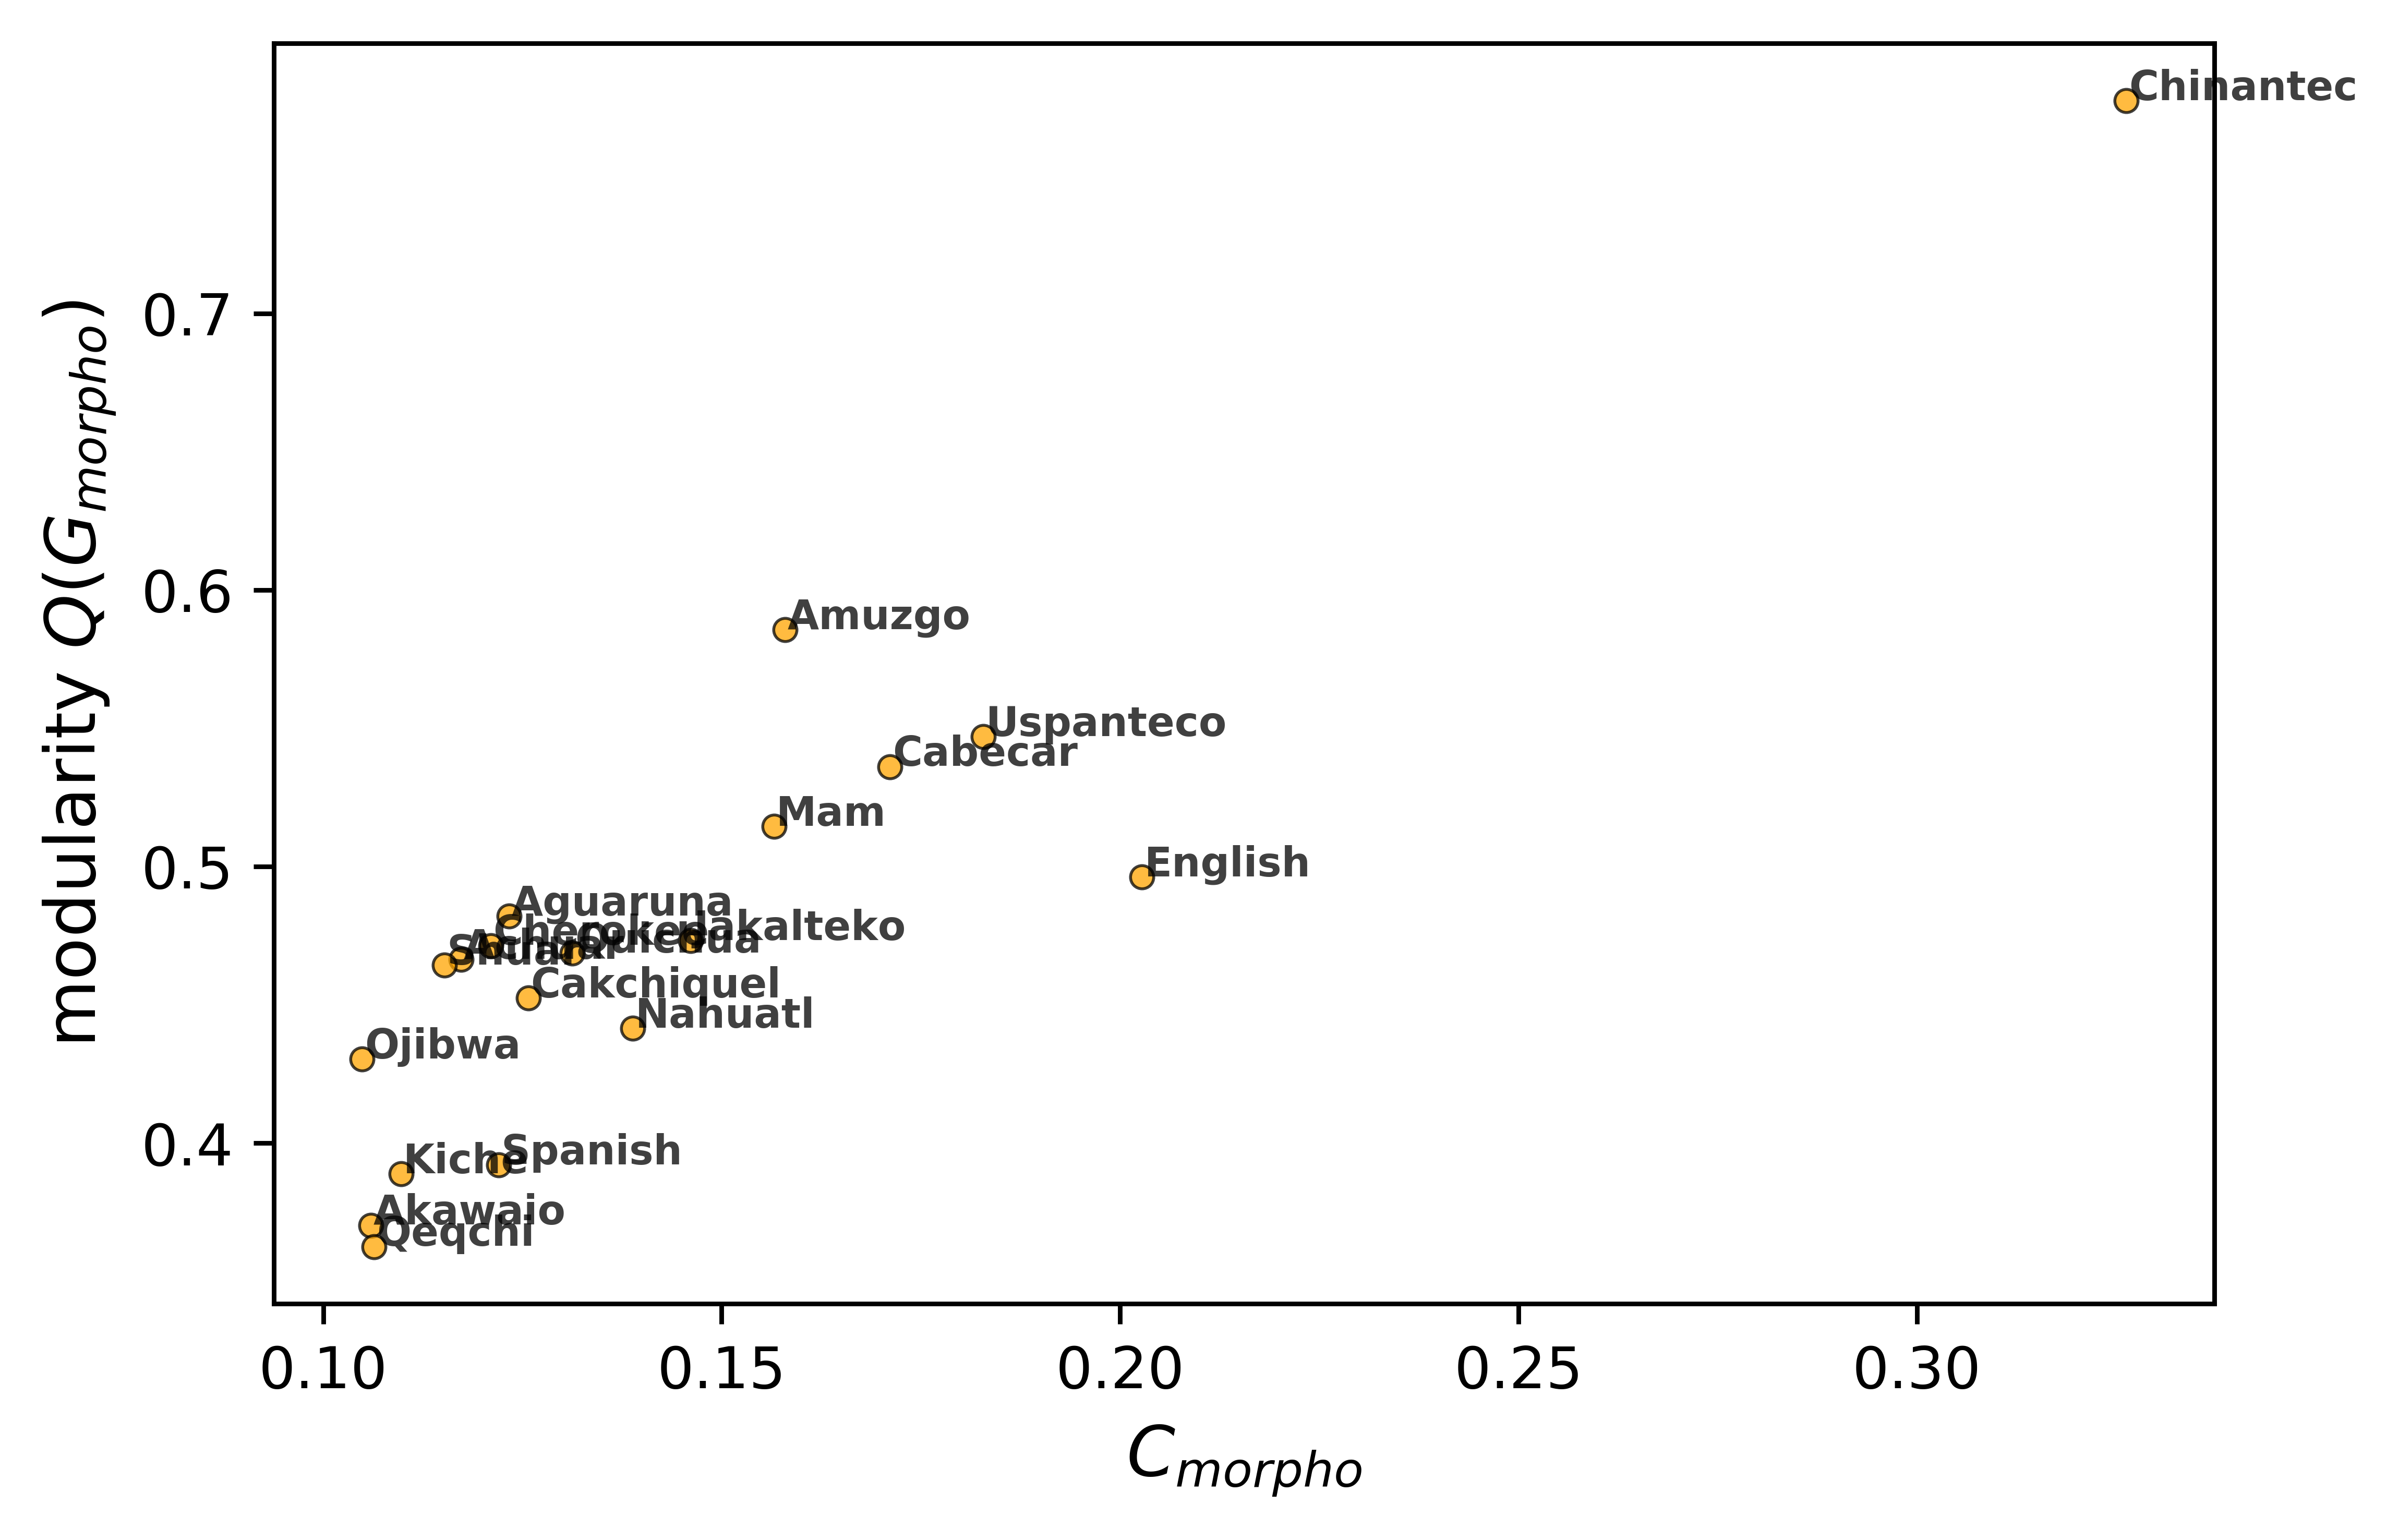

In [45]:
fig, ax = plt.subplots(dpi=800)

from scipy.optimize import curve_fit

X=[]
Y=[]

for language in languages.keys():
    x=E_word[language]
    y=partition_word[language]
   
    ax.plot(x,y,marker='o',color='orange',markersize=4,markeredgecolor='k',markeredgewidth=0.5,alpha=0.75,fillstyle='full',clip_on=True)
    ax.annotate(language, weight='demi', color='k', xy=(x+0.0003,y+0.0003), fontsize=7, alpha=0.75)

plt.grid(False)
#plt.legend(loc='best')
#plt.xlim([-4.25,7.25])
#plt.ylim([-1.75,2.25])
plt.ylabel(r'modularity $Q(G_{morpho})$',fontsize=12)
plt.xlabel(r'$C_{morpho}$',fontsize=12)
plt.rcParams.update({'font.size': 10})
plt.savefig('modularity_word.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()